# Tokenizers: Comprehensive Course Material
## Natural Language Processing Master's Programme
### Session 1 - Block 1: Tokenization Theory and Practice

---

## Table of Contents
1. [Introduction and Motivation](#introduction)
2. [Theoretical Foundations](#theoretical-foundations)
3. [Classical Tokenization Methods](#classical-methods)
4. [Modern Subword Tokenization](#subword-tokenization)
5. [Multilingual Tokenization](#multilingual)
6. [Implementation and Comparison](#implementation)
7. [Practical Exercises](#exercises)
8. [Performance Analysis and Visualization](#performance)
9. [Solutions](#solutions)

---

## 1. Introduction and Motivation

### 1.1 What is Tokenization?

Tokenization is the fundamental preprocessing step in Natural Language Processing (NLP) where raw text is decomposed into meaningful linguistic units called **tokens**. These tokens serve as the primary input to virtually all downstream NLP models, from traditional statistical models to modern deep learning architectures.

The importance of tokenization cannot be overstated: the choice of tokenization strategy directly impacts model performance, computational efficiency, vocabulary size, and the model's ability to generalize to unseen language phenomena.

```
Text: "The quick brown fox didn't jump over the lazy dog."

Word-level tokenization:
["The", "quick", "brown", "fox", "didn't", "jump", "over", "the", "lazy", "dog", "."]

Character-level tokenization:
["T", "h", "e", " ", "q", "u", "i", "c", "k", ..., ".", ""]

Subword tokenization (BPE):
["The", "quick", "brown", "fox", "did", "n't", "jump", "over", "the", "lazy", "dog", "."]
```

### 1.2 Historical Context and Evolution

The evolution of tokenization approaches reflects broader shifts in NLP methodology:

- **Pre-2010s**: Rule-based and regex-based tokenization dominated, with language-specific heuristics
- **2010-2015**: Statistical methods emerged; frequency-based approaches became standard
- **2015-2019**: Subword tokenization revolutionized the field (BPE, WordPiece, SentencePiece)
- **2020-Present**: Unified tokenizers integrated with transformer models; language-aware specialized tokenizers

### 1.3 Tokenization as a Design Decision

Every tokenization strategy involves trade-offs:

| Aspect | Word-level | Character-level | Subword |
|--------|-----------|-----------------|---------|
| Vocabulary Size | Large | Minimal (26-256) | Medium |
| OOV Handling | Poor | Excellent | Good |
| Computational Cost | Low | High | Medium |
| Semantic Preservation | Excellent | Poor | Good |
| Model Parameters | Fewer | More | Balanced |

---

## 2. Theoretical Foundations

### 2.1 Information-Theoretic Perspective

From an information theory standpoint, tokenization seeks to find an optimal balance between compression and representational capacity. Consider the entropy of a vocabulary:

**Entropy of vocabulary V:**
$$H(V) = -\sum_{i=1}^{|V|} p(v_i) \log_2 p(v_i)$$

where $p(v_i)$ is the probability of token $v_i$ in the corpus.

The goal is to minimize vocabulary entropy while maintaining linguistic information. Subword tokenization achieves this through recursive partitioning of high-frequency character sequences.

### 2.2 Vocabulary Construction Algorithms

#### 2.2.1 Byte-Pair Encoding (BPE)

BPE iteratively merges the most frequent adjacent byte or character pairs:

**Algorithm:**
```
Initialize: vocabulary = all characters in corpus
While vocabulary_size < target_size:
    1. Count all adjacent pair frequencies
    2. Merge most frequent pair
    3. Add new token to vocabulary
    4. Update corpus with merged pair
```

**Complexity:** O(n·k) where n is corpus size and k is iterations

#### 2.2.2 WordPiece Tokenization

WordPiece, used in BERT, extends BPE by using likelihood scores instead of raw frequency:

**Merge criterion:**
$$score(A, B) = \frac{freq(AB)}{freq(A) \times freq(B)}$$

This likelihood-based approach prefers meaningful combinations over frequent but semantically unrelated pairs.

#### 2.2.3 SentencePiece

SentencePiece treats tokenization as a sequence modeling problem and builds vocabulary directly from raw bytes without language-specific preprocessing:

**Key properties:**
- Handles any language uniformly (language-agnostic)
- Preserves information about whitespace (uses special token ▁)
- Supports both BPE and Unigram variants
- No preprocessing required (no dependency on language-specific text normalization)

### 2.3 Formal Definition

A tokenizer $\mathcal{T}$ is a function:

$$\mathcal{T}: \Sigma^* \rightarrow V^*$$

where:
- $\Sigma^*$ is the space of all possible text sequences
- $V^*$ is the space of all possible token sequences
- $|V| \ll |\Sigma|$ (vocabulary is much smaller than character alphabet)

The tokenizer must satisfy:
1. **Surjectivity on training data**: Every token in $V$ appears at least once
2. **Invertibility (approximate)**: Text can be reconstructed with minimal loss
3. **Consistency**: Same input always produces same tokenization

### 2.4 Linguistic Properties of Tokens

Tokens should ideally exhibit these properties:

1. **Morphological coherence**: Related word forms share token prefixes
   - Example: "running", "runner", "runs" → ["run", "+ing"], ["run", "+er"], ["run", "+s"]

2. **Semantic preservation**: Tokens combine to preserve meaning
   - Example: "unhappy" → ["un", "happy"] (negation + base)

3. **Frequency robustness**: Token frequency distribution follows Zipfian law
   - P(token_rank) ∝ rank^(-α), typically α ≈ 1-1.5

## 2.5 Morphological Normalization: Stems vs. Lemmas

In the context of tokenization, simply splitting text is often insufficient to capture the semantic core of a word. To reduce vocabulary size and group related concepts, we often rely on **Stemming** and **Lemmatization**.

### 2.5.1 Definitions

#### Stem (Stemming)
- **Definition:** A crude heuristic process that chops off the ends of words to reduce them to a base form. It does not require a dictionary and typically uses rule-based algorithms (e.g., Porter Stemmer).
- **Result:** The resulting *stem* is not always a valid word.
- **Example:**  
  *"Happiness"* → *"Happi"* (suffix stripping)

#### Lemma (Lemmatization)
- **Definition:** A linguistic process that uses a vocabulary and morphological analysis (PoS tagging) to return the dictionary base form of a word.
- **Result:** The resulting *lemma* is always a valid word.
- **Example:**  
  *"Better"* → *"Good"* (understanding irregular forms)

---

### 2.5.2 Comparison

| Input Word | Stemming (Heuristic) | Lemmatization (Linguistic) | Analysis |
|-----------|---------------------|----------------------------|----------|
| changing  | chang               | change                     | Stemming simply removes *"ing"*; lemmatization restores the *"e"*. |
| better    | better              | good                       | Stemming fails on irregulars; lemmatization understands the root concept. |
| ponies    | poni                | pony                       | Stemming blindly replaces *"ies"* with *"i"*. |
| saw       | saw                 | see (verb) / saw (noun)    | Lemmatization requires context (part-of-speech) to distinguish. |

---

### 2.5.3 Relationship with Tokenizers

The relationship depends on the generation of tokenizer:

#### Classical Tokenizers (Word-level)
- Often relied heavily on **stemming** as a pre-processing step to reduce vocabulary size.
- **Example:**  
  If you tokenized *"run"*, *"running"*, and *"runs"* as separate words, your vocabulary grows quickly.  
  Stemming reduced them all to *"run"* before training.

#### Linguistic Tokenizers (spaCy)
- These prioritize **lemmatization**.
- As seen in spaCy code (`token.lemma_`), they aim to provide the most linguistically accurate representation of the text for tasks like information extraction.

#### Modern Subword Tokenizers (BPE / WordPiece)
- These models generally do **not** perform explicit stemming or lemmatization.
- Instead, they rely on **segmentation** to achieve a similar effect implicitly.
- **Example:**  
  BPE might tokenize *"looking"* into `["look", "ing"]`.

  - The token *"look"* effectively acts as the lemma/stem.
  - The token *"ing"* captures the morphological information.

This allows the model to understand that *"looking"* and *"looked"* share the same root (*look*) without requiring a separate lemmatization step.

## 2.5 Text Representation: The Unicode Standard

Before text can be tokenized, it must be represented as bytes. In modern NLP, **Unicode** is the universal standard.

### 2.5.1 What is Unicode?

Unlike ASCII (which only supports English characters), Unicode maps virtually every character in every human language (plus emojis and symbols) to a unique number called a **code point**.

- **Code Point:** The unique ID for a character, usually written as `U+XXXX`.

**Examples:**
- `'A'` → `U+0041`
- `'ñ'` → `U+00F1`
- `'😂'` → `U+1F602`

- **Encoding (UTF-8):** The algorithm that translates code points into binary (bytes).  
  UTF-8 is the dominant encoding because it is **variable-length**:
  - 1 byte for English characters
  - Up to 4 bytes for emojis and rare symbols

---

### 2.5.2 The Normalization Trap

A critical challenge for tokenizers is that Unicode allows **multiple representations for the same visual character**.

- **Precomposed (NFC):**  
  `'ñ'` is stored as one code point (`U+00F1`).

- **Decomposed (NFD):**  
  `'ñ'` is stored as:
  - `'n'` (`U+006E`)
  - `'˜'` (combining tilde `U+0303`)

#### Implication for Tokenizers

If a tokenizer sees:
- the NFC form `'ñ'`
- and the NFD form `'n' + '˜'`

it will treat them as **different tokens**.

**Solution:**  
Always apply **Unicode normalization** (usually **NFC**) before training or applying a tokenizer to ensure consistency.

---

## 2.6 Statistical Properties: Zipf's Law

**Zipf's Law** describes the frequency distribution of words in natural language. It is the primary theoretical justification for **subword tokenization**.

### 2.6.1 The Power Law

Zipf's Law states that the frequency of a token is inversely proportional to its rank in the frequency table:

f(r) ∝ 1 / r^α

Where:
- `r` is the rank (1 = most frequent, 2 = second most frequent, ...)
- `α` is a constant close to 1

#### In practice:
- The most frequent word (rank 1, usually *"the"*) occurs:
  - twice as often as the second (*"of"*)
  - three times as often as the third (*"and"*)

- **The Head:**  
  A tiny number of words account for the majority of the text.

- **The Long Tail:**  
  A massive tail of millions of rare words that occur only once or twice.

---

### 2.6.2 Why This Breaks Word-Level Tokenization

Because of the **long tail**, it is impossible to build a word-level vocabulary that contains every word:

- If you limit the vocabulary to the top 50,000 words:
  - You miss millions of rare words (**OOV problem**).
- If you include all words:
  - The vocabulary becomes computationally infeasible (millions of tokens).

#### Subword Tokenization Solution

Algorithms like **BPE** and **WordPiece** exploit Zipf's Law:

- They keep the **Head** (common words) as whole tokens.
- They break the **Long Tail** (rare words) into smaller, more frequent subword units.

This balances vocabulary size, coverage, and computational efficiency.

---

## 3. Classical Tokenization Methods

### 3.1 Word-Level Tokenization

The simplest approach: split on whitespace and punctuation.

In [1]:
import re
from typing import List
from collections import Counter

class SimpleWordTokenizer:
    """
    Basic word-level tokenizer using regex splitting.
    Handles common punctuation and whitespace normalization.
    """

    def __init__(self, lowercase: bool = True, remove_punctuation: bool = False):
        self.lowercase = lowercase
        self.remove_punctuation = remove_punctuation
        self.pattern = r'\b\w+(?:\'[a-z]+)?\b|\S'
        self.vocab = set()
        self.token_freq = Counter()

    def tokenize(self, text: str) -> List[str]:
        """
        Tokenize text into words.

        Args:
            text: Input text string

        Returns:
            List of tokens
        """
        if self.lowercase:
            text = text.lower()

        tokens = re.findall(self.pattern, text, re.IGNORECASE)

        if self.remove_punctuation:
            tokens = [t for t in tokens if t.isalnum() or "'" in t]

        self.vocab.update(tokens)
        self.token_freq.update(tokens)
        return tokens

    def detokenize(self, tokens: List[str]) -> str:
        """Reconstruct text from tokens (approximate)."""
        return ' '.join(tokens)


# Usage example
tokenizer = SimpleWordTokenizer(lowercase=True)
text = "Don't forget: the quick fox jumped over the fence!"
tokens = tokenizer.tokenize(text)
print(f"Tokens: {tokens}")

Tokens: ["don't", 'forget', ':', 'the', 'quick', 'fox', 'jumped', 'over', 'the', 'fence', '!']


### 3.2 Character-Level Tokenization

Tokenize into individual characters.

In [2]:
class CharacterTokenizer:
    """
    Character-level tokenizer. Every character becomes a token.
    Useful for sequence-to-sequence models and language-agnostic approaches.
    """

    def __init__(self, include_whitespace: bool = True):
        self.include_whitespace = include_whitespace
        self.vocab = set()

    def build_vocab(self, texts: List[str]) -> set:
        """Build vocabulary from texts."""
        for text in texts:
            if self.include_whitespace:
                self.vocab.update(set(text))
            else:
                self.vocab.update(set(c for c in text if not c.isspace()))
        return self.vocab

    def tokenize(self, text: str) -> List[str]:
        """Tokenize text into characters."""
        if not self.include_whitespace:
            text = text.replace(' ', '▁')
        return list(text)

    def detokenize(self, tokens: List[str]) -> str:
        """Reconstruct text from characters."""
        return ''.join(tokens).replace('▁', ' ')


# Usage example
char_tokenizer = CharacterTokenizer(include_whitespace=False)
text = "Natural Language"
tokens = char_tokenizer.tokenize(text)
print(f"Character tokens: {tokens}")

Character tokens: ['N', 'a', 't', 'u', 'r', 'a', 'l', '▁', 'L', 'a', 'n', 'g', 'u', 'a', 'g', 'e']


### 3.3 N-gram Tokenization

Capture fixed-length sequences of tokens.

In [3]:
class NgramTokenizer:
    """
    N-gram tokenizer producing overlapping sequences of n tokens.
    Useful for feature extraction and linguistic analysis.
    """

    def __init__(self, n: int = 2):
        self.n = n

    def tokenize(self, text: str, token_level: str = 'word') -> List[List[str]]:
        """
        Generate n-grams from text.

        Args:
            text: Input text
            token_level: 'word' or 'char'

        Returns:
            List of n-grams
        """
        if token_level == 'word':
            tokens = text.split()
        else:
            tokens = list(text)

        ngrams = [tokens[i:i+self.n] for i in range(len(tokens) - self.n + 1)]
        return ngrams

    def ngram_frequency(self, ngrams: List[List[str]]) -> dict:
        """Calculate n-gram frequency distribution."""
        ngram_strings = [' '.join(ng) for ng in ngrams]
        return Counter(ngram_strings)


# Usage example
bigram_tokenizer = NgramTokenizer(n=2)
text = "the quick brown fox jumps"
bigrams = bigram_tokenizer.tokenize(text, token_level='word')
print(bigrams)

[['the', 'quick'], ['quick', 'brown'], ['brown', 'fox'], ['fox', 'jumps']]


## 4. Modern Subword Tokenization {#subword-tokenization}

### 4.1 Byte-Pair Encoding (BPE) in Detail

BPE builds a vocabulary by iteratively merging the most frequent byte or character sequences.

In [4]:
import re
from collections import Counter
from typing import List, Dict, Tuple, Set

class BytePairEncoding:
    """
    Implements Byte-Pair Encoding (BPE) tokenization algorithm.
    Used by GPT models and others to tokenize text into subword units.
    """

    def __init__(self, vocab_size: int = 1000, num_merges: int = None):
        self.vocab_size = vocab_size
        # If num_merges is not provided, we estimate it.
        # In a real scenario, this depends on the initial alphabet size.
        self.num_merges = num_merges or (vocab_size - 256)
        self.word_freq = Counter()
        self.vocab: Set[str] = set()
        self.merge_rules: List[Tuple[str, str]] = []

    def _get_stats(self, vocab: Dict[str, int]) -> Counter:
        """
        Calculate frequency of adjacent pairs in the current vocabulary.
        Returns a Counter mapping (symbol1, symbol2) -> frequency.
        """
        pairs = Counter()
        for word, freq in vocab.items():
            symbols = word.split()
            for i in range(len(symbols) - 1):
                pairs[symbols[i], symbols[i+1]] += freq
        return pairs

    def _merge_vocab(self, pair: Tuple[str, str], vocab: Dict[str, int]) -> Dict[str, int]:
        """
        Merge the most frequent pair in the vocabulary.
        We replace all occurrences of 'char1 char2' with 'char1char2'.
        """
        new_vocab = {}
        # We need to escape special regex characters just in case,
        # though strictly speaking standard BPE just does string replacement.
        bigram = ' '.join(pair)
        replacement = ''.join(pair)

        for word in vocab:
            # We replace the space-separated bigram with the merged token
            new_word = word.replace(bigram, replacement)
            new_vocab[new_word] = vocab[word]

        return new_vocab

    def train(self, texts: List[str]):
        """
        Train BPE on a provided corpus of text.
        1. Pre-tokenize words by character.
        2. Iteratively merge the most frequent adjacent pairs.
        """
        print(f"--- Starting Training with {len(texts)} sentences ---")

        # 1. Initialize vocabulary with character-level tokens
        # We add </w> to mark the end of a word (helps preserve word boundaries)
        vocab = Counter()
        for text in texts:
            # Simple whitespace splitting for the input corpus
            for word in text.split():
                word_tokens = ' '.join(list(word)) + ' </w>'
                vocab[word_tokens] += 1

        self.word_freq = vocab.copy()

        # 2. Iterative Merging
        for i in range(self.num_merges):
            pairs = self._get_stats(vocab)

            # Stop if no pairs are left to merge
            if not pairs:
                break

            # Get the most frequent pair
            best = pairs.most_common(1)[0][0]

            # Update vocabulary and record the rule
            vocab = self._merge_vocab(best, vocab)
            self.merge_rules.append(best)

            if (i + 1) % 10 == 0:  # Print every 10 merges for visibility
                print(f"Merge {i+1}/{self.num_merges}: Merged {best} -> {''.join(best)}")

        # 3. Finalize the vocabulary set (unique tokens)
        self.vocab = set()
        for word in vocab:
            for token in word.split():
                self.vocab.add(token)

        print(f"Training Complete. Learned {len(self.merge_rules)} merge rules.")

    def encode(self, text: str) -> List[str]:
        """
        Encode text using the learned BPE merge rules.
        We start with characters and apply merges in the order they were learned.
        """
        words = text.split()
        tokens = []

        for word in words:
            # Start with characters
            word_tokens = list(word) + ['</w>']

            # Apply every learned rule sequentially
            for rule in self.merge_rules:
                i = 0
                new_tokens = []
                while i < len(word_tokens):
                    # Check if the current token and next token match the rule pair
                    if (i < len(word_tokens) - 1 and
                        word_tokens[i] == rule[0] and
                        word_tokens[i+1] == rule[1]):

                        # Merge them
                        new_tokens.append(''.join(rule))
                        i += 2 # Skip the next token as it was just merged
                    else:
                        new_tokens.append(word_tokens[i])
                        i += 1
                word_tokens = new_tokens

            tokens.extend(word_tokens)

        return tokens

# --- 1. Define Training Corpus ---
# A small realistic corpus about AI to train patterns like "ing", "th", "er".
corpus = [
    "Machine learning is a field of artificial intelligence.",
    "Deep learning models use neural networks to learn from data.",
    "The tokenizer splits text into smaller subword units.",
    "Training a model requires a large dataset and computing power.",
    "The quick brown fox jumps over the lazy dog."
]

corpus = [i.lower() for i in corpus]

# --- 2. Initialize and Train ---
# We limit merges to 50 for this demo so we can see the output clearly.
bpe = BytePairEncoding(vocab_size=100, num_merges=1000)
bpe.train(corpus)

# --- 3. Tokenize a Realistic Phrase ---
# Note: "learning" is in the training set. "faster" shares patterns with "tokenizer" (er).
test_phrase = "The machine is learning faster"

print(f"\nOriginal phrase: '{test_phrase}'")
encoded_tokens = bpe.encode(test_phrase)
print(f"Tokenized: {encoded_tokens}")

# Let's inspect what subwords were actually created
print(f"\nReadable tokens: {encoded_tokens}")

--- Starting Training with 5 sentences ---
Merge 10/1000: Merged ('le', 'ar') -> lear
Merge 20/1000: Merged ('f', 'i') -> fi
Merge 30/1000: Merged ('to', '</w>') -> to</w>
Merge 40/1000: Merged ('m', 'p') -> mp
Merge 50/1000: Merged ('ar', 't') -> art
Merge 60/1000: Merged ('intellig', 'en') -> intelligen
Merge 70/1000: Merged ('us', 'e</w>') -> use</w>
Merge 80/1000: Merged ('fro', 'm') -> from
Merge 90/1000: Merged ('spli', 't') -> split
Merge 100/1000: Merged ('subwor', 'd</w>') -> subword</w>
Merge 110/1000: Merged ('model', '</w>') -> model</w>
Merge 120/1000: Merged ('a', 'n') -> an
Merge 130/1000: Merged ('power', '.</w>') -> power.</w>
Merge 140/1000: Merged ('fox', '</w>') -> fox</w>
Merge 150/1000: Merged ('d', 'o') -> do
Training Complete. Learned 152 merge rules.

Original phrase: 'The machine is learning faster'
Tokenized: ['T', 'h', 'e</w>', 'mach', 'in', 'e</w>', 'is</w>', 'learning</w>', 'f', 'a', 's', 't', 'er</w>']

Readable tokens: ['T', 'h', 'e</w>', 'mach', 'in', '

### 4.2 WordPiece Tokenization

WordPiece uses likelihood scores rather than frequency.

In [5]:
from collections import Counter
from typing import List, Dict, Tuple, Set

class WordPieceTokenizer:
    """
    Implements a simplified WordPiece tokenization algorithm.
    Used by BERT and other transformer models.
    Unlike BPE, this selects merges based on likelihood (score), not just frequency.
    """

    def __init__(self, vocab_size: int = 1000, num_merges: int = None):
        self.vocab_size = vocab_size
        self.num_merges = num_merges or (vocab_size - 256)
        self.vocab: Set[str] = set()
        self.merge_rules: List[Tuple[str, str]] = []
        self.word_freq = Counter()

    def _calculate_likelihood(self, pair: Tuple[str, str], pair_freq: int, vocab: Dict[str, int]) -> float:
        """
        Calculate likelihood score for a pair.
        Score = pair_freq / (freq_of_first_symbol * freq_of_second_symbol)
        This prioritizes pairs that stick together strongly, even if they aren't the most frequent overall.
        """
        # Count how often the individual parts appear anywhere in the current vocabulary
        a_freq = 0
        b_freq = 0

        for word, freq in vocab.items():
            symbols = word.split()
            # We count occurrences of the symbols in the current split state
            a_freq += freq * symbols.count(pair[0])
            b_freq += freq * symbols.count(pair[1])

        if a_freq == 0 or b_freq == 0:
            return 0

        # WordPiece Score formula
        return pair_freq / (a_freq * b_freq)

    def train(self, texts: List[str]):
        """Train WordPiece on corpus."""
        print(f"--- Starting Training with {len(texts)} sentences ---")

        # 1. Initialize vocabulary
        vocab = Counter()
        for text in texts:
            for word in text.split():
                # Note: Real BERT uses '##' prefixes, here we use simple suffix markers for demo
                word_tokens = ' '.join(list(word)) + ' </w>'
                vocab[word_tokens] += 1

        self.word_freq = vocab.copy()

        # 2. Iterative Merging based on Likelihood
        for iteration in range(self.num_merges):
            pair_freq = Counter()

            # Count pair frequencies
            for word, freq in vocab.items():
                symbols = word.split()
                for i in range(len(symbols) - 1):
                    pair_freq[(symbols[i], symbols[i+1])] += freq

            if not pair_freq:
                break

            # Find the pair with the HIGHEST LIKELIHOOD score
            best_pair = None
            best_score = -1.0

            # Optimization: check only the top frequent pairs to save time,
            # though strictly WordPiece checks all.
            for pair, freq in pair_freq.most_common(len(pair_freq)):
                score = self._calculate_likelihood(pair, freq, vocab)
                if score > best_score:
                    best_score = score
                    best_pair = pair

            if best_pair is None:
                break

            # Apply the merge
            self.merge_rules.append(best_pair)
            bigram = ' '.join(best_pair)
            replacement = ''.join(best_pair)
            new_vocab = {}

            for word in vocab:
                new_word = word.replace(bigram, replacement)
                new_vocab[new_word] = vocab[word]

            vocab = new_vocab

            if (iteration + 1) % 10 == 0:
                 print(f"Merge {iteration+1}/{self.num_merges}: Merged {best_pair} (Score: {best_score:.6f})")

        # 3. Finalize Vocabulary
        self.vocab = set()
        for word in vocab:
            for token in word.split():
                self.vocab.add(token)

        print(f"Training Complete. Learned {len(self.merge_rules)} merge rules.")

    def encode(self, text: str) -> List[str]:
        """
        Encode text using the learned rules.
        """
        words = text.split()
        tokens = []

        for word in words:
            word_tokens = list(word) + ['</w>']

            # Apply merges in order
            for rule in self.merge_rules:
                i = 0
                new_tokens = []
                while i < len(word_tokens):
                    if (i < len(word_tokens) - 1 and
                        word_tokens[i] == rule[0] and
                        word_tokens[i+1] == rule[1]):
                        new_tokens.append(''.join(rule))
                        i += 2
                    else:
                        new_tokens.append(word_tokens[i])
                        i += 1
                word_tokens = new_tokens

            tokens.extend(word_tokens)

        return tokens

In [6]:
# --- 1. Define Training Corpus ---
corpus = [
    "Machine learning is a field of artificial intelligence.",
    "Deep learning models use neural networks to learn from data.",
    "The tokenizer splits text into smaller subword units.",
    "Training a model requires a large dataset and computing power.",
    "The quick brown fox jumps over the lazy dog."
]

corpus = [i.lower() for i in corpus]

# --- 2. Initialize and Train ---
# WordPiece often finds "tighter" semantic units than BPE.
wp = WordPieceTokenizer(vocab_size=100, num_merges=1000)
wp.train(corpus)

# --- 3. Tokenize a Realistic Phrase ---
test_phrase = "The machine is learning faster"

print(f"\nOriginal phrase: '{test_phrase}'")
encoded_tokens = wp.encode(test_phrase)
print(f"Tokenized: {encoded_tokens}")

--- Starting Training with 5 sentences ---
Merge 10/1000: Merged ('subw', 'o') (Score: 0.066667)
Merge 20/1000: Merged ('b', 'r') (Score: 0.062500)
Merge 30/1000: Merged ('i', 'z') (Score: 0.062500)
Merge 40/1000: Merged ('k', 's') (Score: 0.050000)
Merge 50/1000: Merged ('mo', 'd') (Score: 0.125000)
Merge 60/1000: Merged ('fi', 'c') (Score: 0.250000)
Merge 70/1000: Merged ('s', 'p') (Score: 0.062500)
Merge 80/1000: Merged ('smal', 'l') (Score: 0.090909)
Merge 90/1000: Merged ('n', 'i') (Score: 0.200000)
Merge 100/1000: Merged ('a', 'rning') (Score: 0.071429)
Merge 110/1000: Merged ('dat', 'a') (Score: 0.142857)
Merge 120/1000: Merged ('th', 'e') (Score: 0.035714)
Merge 130/1000: Merged ('fie', 'ld') (Score: 1.000000)
Merge 140/1000: Merged ('us', 'e') (Score: 0.083333)
Merge 150/1000: Merged ('e', 'quir') (Score: 0.166667)
Merge 160/1000: Merged ('ove', 'r') (Score: 1.000000)
Merge 170/1000: Merged ('deep', '</w>') (Score: 0.032258)
Merge 180/1000: Merged ('splits', '</w>') (Score: 0.

### 4.3 SentencePiece: Language-Agnostic Tokenization

SentencePiece treats tokenization as a sequence modeling problem.

In [7]:
import os
import sys
from typing import List

try:
    import sentencepiece as spm
except ImportError:
    print("Error: 'sentencepiece' library is not installed.")
    print("Please run: pip install sentencepiece")
    sys.exit(1)

class SentencePieceTokenizer:
    """
    Wrapper for Google's SentencePiece tokenizer.
    Features:
      - Lossless tokenization (spaces are treated as symbols: '_').
      - Language agnostic (no pre-tokenization required).
      - Supports both BPE and Unigram algorithms.
    """

    def __init__(self, vocab_size: int = 100, model_type: str = 'unigram'):
        # Valid model_type: 'unigram', 'bpe', 'char', 'word'
        self.vocab_size = vocab_size
        self.model_type = model_type
        self.sp = None
        self.model_prefix = 'sp_model'

    def train(self, texts: List[str]):
        """
        Train SentencePiece model.
        SentencePiece requires a physical file as input, so we create a temp file.
        """
        temp_file = 'temp_corpus.txt'

        # 1. Write the corpus to a temporary file
        with open(temp_file, 'w', encoding='utf-8') as f:
            f.write('\n'.join(texts))

        print(f"--- Training SentencePiece ({self.model_type}) ---")

        # 2. Train the model using the C++ backend
        # We must ensure vocab_size < number of unique characters in corpus + special tokens
        try:
            spm.SentencePieceTrainer.train(
                input=temp_file,
                model_prefix=self.model_prefix,
                vocab_size=self.vocab_size,
                model_type=self.model_type,
                character_coverage=1.0, # Use 1.0 to ensure all characters are included
                unk_id=0,
                bos_id=1,
                eos_id=2,
                pad_id=-1
            )
        except RuntimeError as e:
            print(f"Training failed: {e}")
            print("Tip: Try reducing vocab_size if your corpus is very small.")
            return

        # 3. Load the trained model into memory
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(f'{self.model_prefix}.model')

        # 4. Cleanup temporary files (optional but recommended)
        if os.path.exists(temp_file):
            os.remove(temp_file)

        print("Training successful. Model loaded.")

    def encode(self, text: str) -> List[str]:
        """Encode text into tokens (pieces)."""
        if self.sp is None:
            raise ValueError("Model not trained. Call train() first.")

        # EncodeAsPieces returns the string tokens (e.g., ['_Hello', ' world'])
        return self.sp.EncodeAsPieces(text)

    def decode(self, tokens: List[str]) -> str:
        """Decode tokens back to text (Lossless reconstruction)."""
        if self.sp is None:
            raise ValueError("Model not trained. Call train() first.")

        return self.sp.DecodePieces(tokens)

In [8]:
# --- 1. Define Training Corpus ---
# We use a slightly larger corpus to ensure SentencePiece has enough data
corpus = [
    "Machine learning is a field of artificial intelligence.",
    "Deep learning models use neural networks to learn from data.",
    "The tokenizer splits text into smaller subword units.",
    "Training a model requires a large dataset and computing power.",
    "The quick brown fox jumps over the lazy dog.",
    "SentencePiece treats the input as a raw stream of unicode characters.",
    "It handles whitespace as a normal symbol."
]

# --- 2. Initialize and Train ---
# Note: For this tiny corpus, we keep vocab_size very small (e.g., 60).
# If vocab_size is larger than the number of unique characters, SP will fail.
tokenizer = SentencePieceTokenizer(vocab_size=60, model_type='unigram')
tokenizer.train(corpus)

# --- 3. Tokenize a Realistic Phrase ---
test_phrase = "The machine is learning faster"

print(f"\nOriginal phrase: '{test_phrase}'")

# Encode
tokens = tokenizer.encode(test_phrase)
print(f"Tokens: {tokens}")

# Decode (Reconstruction)
decoded_text = tokenizer.decode(tokens)
print(f"Decoded: '{decoded_text}'")

# Check reversibility
assert test_phrase == decoded_text
print("\nSuccess: Decoded text matches original exactly.")

--- Training SentencePiece (unigram) ---
Training successful. Model loaded.

Original phrase: 'The machine is learning faster'
Tokens: ['▁', 'T', 'h', 'e', '▁', 'm', 'ac', 'h', 'in', 'e', '▁', 'i', 's', '▁learn', 'in', 'g', '▁', 'f', 'a', 's', 't', 'er']
Decoded: 'The machine is learning faster'

Success: Decoded text matches original exactly.


---

## 5. Multilingual Tokenization {#multilingual}

### 5.1 Challenges in Multilingual NLP

Different languages present unique tokenization challenges:

| Language | Challenge | Example |
|----------|-----------|---------|
| **English** | Contractions, compound words | "don't", "well-being" |
| **Chinese** | No word boundaries | "自然语言处理" (4 chars, but semantic units?) |
| **German** | Compound words | "Donaudampfschifffahrtsgesellschaftskapitän" |
| **Japanese** | Mix of scripts (Hiragana, Kanji, Katakana) | ひらがな、漢字、カタカナ |
| **Arabic** | Right-to-left, diacritics | "والمدرسة" (diacritics affect meaning) |
| **Finnish** | Agglutination, rich morphology | "juoksentelisinkohan" (ran, perhaps?) |

### 5.2 Language-Specific Tokenizers

#### 5.2.1 NLTK Tokenizers

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.punkt import PunktSentenceTokenizer
import nltk

# Download required NLTK resources
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

class NLTKTokenizer:
    """
    NLTK-based tokenizer supporting multiple languages.
    Provides sentence and word tokenization.
    """

    def __init__(self, language: str = 'english'):
        """
        Initialize NLTK tokenizer.

        Args:
            language: Language code ('english', 'spanish', 'french', etc.)
        """
        self.language = language
        self.sent_tokenizer = PunktSentenceTokenizer()

    def tokenize_sentences(self, text: str) -> List[str]:
        """Split text into sentences."""
        return sent_tokenize(text, language=self.language)

    def tokenize_words(self, text: str) -> List[str]:
        """Split text into words."""
        return word_tokenize(text, language=self.language)

    def tokenize_both(self, text: str) -> List[List[str]]:
        """Return both sentence and word tokenization."""
        sentences = self.tokenize_sentences(text)
        return [self.tokenize_words(sent) for sent in sentences]


# Usage example
nltk_en = NLTKTokenizer(language='english')
text_en = "Natural Language Processing is fascinating. It's used everywhere!"
print(nltk_en.tokenize_both(text_en))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['Natural', 'Language', 'Processing', 'is', 'fascinating', '.'], ['It', "'s", 'used', 'everywhere', '!']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### 5.2.2 Spacy Tokenizers (Language-Aware)


In [10]:
"""
Spacy provides industrial-strength NLP tokenization
with language-specific models.

Install: pip install spacy
Download models:
  python -m spacy download en_core_web_sm
  python -m spacy download es_core_news_sm
  python -m spacy download fr_core_news_sm
  python -m spacy download zh_core_web_sm
"""

import sys
from typing import List, Tuple, Dict, Optional

try:
    import spacy
except ImportError:
    print("Error: 'spacy' library is not installed.")
    print("Please run: pip install spacy")
    sys.exit(1)

class SpacyTokenizer:
    """
    Spacy-based multilingual tokenizer.
    Unlike BPE/WordPiece which are subword tokenizers, Spacy is a 'Linguistic' tokenizer.
    It uses grammatical rules to split text into linguistically valid words and punctuation.
    """

    def __init__(self, language_code: str = 'en'):
        """
        Initialize Spacy tokenizer by loading the appropriate model.
        Args:
            language_code: Language code ('en', 'es', 'fr', 'zh', 'de', etc.)
        """
        self.language_code = language_code

        # Map simple language codes to standard Spacy model names
        self.model_map = {
            'en': 'en_core_web_sm', # English
            'es': 'es_core_news_sm',# Spanish
            'fr': 'fr_core_news_sm',# French
            'zh': 'zh_core_web_sm', # Chinese
            'de': 'de_core_news_sm',# German
            'it': 'it_core_news_sm',# Italian
            'ja': 'ja_core_news_sm' # Japanese
        }

        model_name = self.model_map.get(language_code)

        if not model_name:
            print(f"Warning: No default model map for '{language_code}'. Trying to load '{language_code}' directly.")
            model_name = language_code

        print(f"--- Loading Spacy Model: {model_name} ---")
        try:
            # We disable components we don't need for pure tokenization to speed it up
            # However, for POS/Lemma features, we need the full pipeline.
            self.nlp = spacy.load(model_name)
        except OSError:
            print(f"\nError: Model '{model_name}' not found.")
            print(f"To fix this, run the following command in your terminal:\n")
            print(f"    python -m spacy download {model_name}\n")
            self.nlp = None

    def _check_model(self):
        if self.nlp is None:
            raise ValueError("Spacy model not loaded. Please download the model first.")

    def tokenize(self, text: str) -> List[str]:
        """Tokenize text into words and punctuation."""
        self._check_model()
        doc = self.nlp(text)
        return [token.text for token in doc]

    def tokenize_with_lemma(self, text: str) -> List[Tuple[str, str]]:
        """
        Tokenize and return (token, lemma) pairs.
        Lemma is the 'base form' of the word (e.g., 'running' -> 'run').
        """
        self._check_model()
        doc = self.nlp(text)
        return [(token.text, token.lemma_) for token in doc]

    def tokenize_with_pos(self, text: str) -> List[Tuple[str, str]]:
        """
        Tokenize and return (token, POS) pairs.
        POS = Part of Speech (Noun, Verb, Adjective, etc.)
        """
        self._check_model()
        doc = self.nlp(text)
        return [(token.text, token.pos_) for token in doc]

    def get_statistics(self, text: str) -> Dict:
        """Get detailed linguistic statistics."""
        self._check_model()
        doc = self.nlp(text)

        return {
            'num_tokens': len(doc),
            'num_sentences': len(list(doc.sents)),
            # Named Entities (People, Orgs, Dates, etc.)
            'entities': [(ent.text, ent.label_) for ent in doc.ents],
            'language': self.language_code
        }

In [11]:
# --- 1. Initialize ---
# Ensure you have run: python -m spacy download en_core_web_sm
tokenizer = SpacyTokenizer(language_code='en')

if tokenizer.nlp:
    # --- 2. Define a Complex Sentence ---
    # "running" -> Lemma "run"
    # "Apple" -> Entity "ORG"
    text = "Apple is looking at buying a U.K. startup for $1 billion. They are running fast."

    print(f"\nOriginal text: {text}\n")

    # --- 3. Basic Tokenization ---
    tokens = tokenizer.tokenize(text)
    print(f"Tokens: {tokens}")
    # Note how it handles "U.K." and "$1" smartly, keeping them together or splitting logically.

    # --- 4. Lemmatization (Base forms) ---
    lemmas = tokenizer.tokenize_with_lemma(text)
    print(f"\nLemmas (Base Forms):")
    for token, lemma in lemmas:
        print(f"  {token:<10} -> {lemma}")

    # --- 5. Part of Speech Tagging ---
    pos_tags = tokenizer.tokenize_with_pos(text)
    print(f"\nPart of Speech:")
    print(pos_tags)

    # --- 6. Entities and Stats ---
    stats = tokenizer.get_statistics(text)
    print(f"\nStatistics: {stats}")

--- Loading Spacy Model: en_core_web_sm ---

Original text: Apple is looking at buying a U.K. startup for $1 billion. They are running fast.

Tokens: ['Apple', 'is', 'looking', 'at', 'buying', 'a', 'U.K.', 'startup', 'for', '$', '1', 'billion', '.', 'They', 'are', 'running', 'fast', '.']

Lemmas (Base Forms):
  Apple      -> Apple
  is         -> be
  looking    -> look
  at         -> at
  buying     -> buy
  a          -> a
  U.K.       -> U.K.
  startup    -> startup
  for        -> for
  $          -> $
  1          -> 1
  billion    -> billion
  .          -> .
  They       -> they
  are        -> be
  running    -> run
  fast       -> fast
  .          -> .

Part of Speech:
[('Apple', 'PROPN'), ('is', 'AUX'), ('looking', 'VERB'), ('at', 'ADP'), ('buying', 'VERB'), ('a', 'DET'), ('U.K.', 'PROPN'), ('startup', 'NOUN'), ('for', 'ADP'), ('$', 'SYM'), ('1', 'NUM'), ('billion', 'NUM'), ('.', 'PUNCT'), ('They', 'PRON'), ('are', 'AUX'), ('running', 'VERB'), ('fast', 'ADV'), ('.', 'PUNCT'

### 5.3 Hugging Face Transformers Tokenizers (Multilingual)

In [12]:
import sys
from typing import List, Dict, Union

try:
    from transformers import AutoTokenizer
except ImportError:
    print("Error: 'transformers' library is not installed.")
    print("Please run: pip install transformers")
    sys.exit(1)

class HFMultilingualTokenizer:
    """
    Wrapper for Hugging Face tokenizers supporting 100+ languages.
    Uses pre-trained tokenizers (like XLM-RoBERTa, mBERT) from the Hub.
    """

    def __init__(self, model_name: str = 'xlm-roberta-base'):
        """
        Initialize Hugging Face tokenizer.

        Args:
            model_name: Model identifier from Hugging Face Hub.
            Common options:
              - 'xlm-roberta-base': Excellent for 100+ languages (Uses SentencePiece)
              - 'bert-base-multilingual-cased': Google's mBERT (Uses WordPiece)
        """
        print(f"--- Loading Pre-trained Model: {model_name} ---")
        try:
            self.tokenizer = AutoTokenizer.from_pretrained(model_name)
            self.model_name = model_name
        except Exception as e:
            print(f"Error loading tokenizer: {e}")
            self.tokenizer = None
            self.model_name = None

    def tokenize(self, text: str) -> List[str]:
        """Convert text to string tokens."""
        if self.tokenizer is None:
            raise ValueError("Tokenizer not loaded")
        return self.tokenizer.tokenize(text)

    def encode(self, text: str) -> List[int]:
        """Convert text to integer IDs (input for the Neural Network)."""
        if self.tokenizer is None:
            raise ValueError("Tokenizer not loaded")
        # 'add_special_tokens=False' keeps the output raw,
        # otherwise it adds model-specific start/end tokens (like <s>, [CLS]).
        return self.tokenizer.encode(text, add_special_tokens=False)

    def decode(self, token_ids: List[int]) -> str:
        """Convert token IDs back to human-readable text."""
        if self.tokenizer is None:
            raise ValueError("Tokenizer not loaded")
        return self.tokenizer.decode(token_ids)

# --- 1. Initialize ---
# We load 'xlm-roberta-base', a powerful multilingual model.
hf_tokenizer = HFMultilingualTokenizer('xlm-roberta-base')

# --- 2. The Standard Test Phrase ---
test_phrase = "The machine is learning faster"

print(f"\nOriginal phrase: '{test_phrase}'")

# Tokenize (String representation)
tokens = hf_tokenizer.tokenize(test_phrase)
print(f"Tokens: {tokens}")

# Encode (Numerical representation)
ids = hf_tokenizer.encode(test_phrase)
print(f"Token IDs: {ids}")

# --- 3. Multilingual Capabilities ---
# XLM-R shares one vocabulary across 100 languages.
print("\n--- Multilingual Test ---")
multilingual_texts = {
    'Spanish': "Hola, ¿cómo estás?",
    'Chinese': "你好，你好吗？",  # Nǐ hǎo
    'Arabic': "مرحبا، كيف حالك؟" # Marhaban
}

for lang, text in multilingual_texts.items():
    multi_tokens = hf_tokenizer.tokenize(text)
    print(f"{lang}: {multi_tokens}")

--- Loading Pre-trained Model: xlm-roberta-base ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]


Original phrase: 'The machine is learning faster'
Tokens: ['▁The', '▁machine', '▁is', '▁learning', '▁fast', 'er']
Token IDs: [581, 36279, 83, 52080, 4271, 56]

--- Multilingual Test ---
Spanish: ['▁Hola', ',', '▁¿', 'cómo', '▁estás', '?']
Chinese: ['▁', '你好', ',', '你好', '吗', '?']
Arabic: ['▁م', 'رحب', 'ا', '،', '▁كيف', '▁حال', 'ك', '؟']


### 5.4 Character Encoding and Unicode Handling

In [14]:
import unicodedata
from typing import List, Tuple, Dict, Optional

class UnicodeTokenizer:
    """
    Tokenizer for handling Unicode, script detection, and normalization.
    Essential for preprocessing multilingual text before feeding it into BPE or BERT.
    """

    def __init__(self, normalize: bool = True):
        """
        Initialize the tokenizer.

        Args:
            normalize: If True, applies NFC normalization automatically during processing.
        """
        self.normalize = normalize

    def get_character_properties(self, char: str) -> Dict[str, str]:
        """
        Inspect the internal Unicode properties of a single character.
        Useful for debugging why a tokenizer might be behaving strangely.
        """
        return {
            'character': char,
            # Format code point as a standard hex string (e.g., U+0041)
            'code_point': f"U+{ord(char):04X}",
            # Get the official Unicode name (e.g., 'LATIN CAPITAL LETTER A')
            'name': unicodedata.name(char, 'UNKNOWN'),
            # Get the category (e.g., 'Ll' for lowercase letter, 'Nd' for decimal number)
            'category': unicodedata.category(char),
            'script': self._get_script(char)
        }

    def _get_script(self, char: str) -> str:
        """
        Identify the script (writing system) of a character based on its code point.

        Note: This is a simplified lookup. A production system might use the `regex`
        module or a full Unicode database.
        """
        code = ord(char)

        # Basic Latin (English, etc.)
        if 0x0000 <= code <= 0x007F:
            return 'ASCII'
        # Latin Extended (Western European, etc.)
        elif 0x0100 <= code <= 0x017F:
            return 'Latin Extended'
        # Cyrillic (Russian, Ukrainian, etc.) - ADDED THIS for your example
        elif 0x0400 <= code <= 0x04FF:
            return 'Cyrillic'
        # Arabic
        elif 0x0600 <= code <= 0x06FF:
            return 'Arabic'
        # Common CJK (Chinese/Japanese/Korean) Ideographs
        elif 0x4E00 <= code <= 0x9FFF:
            return 'CJK Ideograph'
        # Japanese Hiragana
        elif 0x3040 <= code <= 0x309F:
            return 'Hiragana'
        # Japanese Katakana
        elif 0x30A0 <= code <= 0x30FF:
            return 'Katakana'
        # Korean Hangul
        elif 0xAC00 <= code <= 0xD7AF:
            return 'Hangul'
        # Fallback for emojis, punctuation, symbols, etc.
        else:
            return unicodedata.category(char)

    def normalize_unicode(self, text: str, form: str = 'NFC') -> str:
        """
        Apply Unicode Normalization.

        Forms:
        - NFC: Canonical Composition (Best for modern web/NLP).
               Example: 'n' + '~' becomes 'ñ'.
        - NFD: Canonical Decomposition.
               Example: 'ñ' becomes 'n' + '~'.
        """
        return unicodedata.normalize(form, text)

    def remove_diacritics(self, text: str) -> str:
        """
        Remove accents and diacritics (e.g., 'café' -> 'cafe').

        Strategy:
        1. Decompose characters (NFD) to separate the base letter from the accent mark.
        2. Filter out characters with category 'Mn' (Mark, nonspacing).
        """
        nfd = unicodedata.normalize('NFD', text)
        return ''.join(c for c in nfd if unicodedata.category(c) != 'Mn')

    def tokenize_by_script(self, text: str) -> List[Tuple[str, str]]:
        """
        Split text whenever the script changes.

        Example: "Hello世界" -> [("Hello", "ASCII"), ("世界", "CJK Ideograph")]
        """
        if self.normalize:
            text = self.normalize_unicode(text, 'NFC')

        result = []
        if not text:
            return result

        current_token = [text[0]]
        current_script = self._get_script(text[0])

        for char in text[1:]:
            script = self._get_script(char)

            # If the script changes (e.g., Latin -> Chinese), save the token and start a new one
            if script != current_script:
                result.append((''.join(current_token), current_script))
                current_token = []
                current_script = script

            current_token.append(char)

        # Append the final token
        if current_token:
            result.append((''.join(current_token), current_script))

        return result

# --- Initialize ---
tokenizer = UnicodeTokenizer(normalize=True)

# --- Test 1: The "Invisible" Difference (Normalization) ---
# 'ñ' written as one character
char_composed = "\u00F1"
# 'n' + combining tilde written as two characters
char_decomposed = "\u006E\u0303"

print(f"--- Unicode Normalization Test ---")
print(f"Visual check: {char_composed} vs {char_decomposed}")
print(f"Are they equal in Python? {char_composed == char_decomposed}")

# Normalize both to NFC
norm_1 = tokenizer.normalize_unicode(char_composed, 'NFC')
norm_2 = tokenizer.normalize_unicode(char_decomposed, 'NFC')
print(f"After Normalization equal? {norm_1 == norm_2}")


# --- Test 2: Multilingual Tokenization ---
# Text containing: English, Emoji, Chinese, Arabic, Russian
mixed_text = "Hello👋 世界 مرح привет"

print(f"\n--- Script Tokenization Test ---")
print(f"Input: {mixed_text}")

tokens = tokenizer.tokenize_by_script(mixed_text)

print(f"{'Token':<15} | {'Script/Category'}")
print("-" * 35)
for token, script in tokens:
    # Replace spaces with visual marker for clarity
    display_token = token.replace(' ', '␣')
    print(f"{display_token:<15} | {script}")

--- Unicode Normalization Test ---
Visual check: ñ vs ñ
Are they equal in Python? False
After Normalization equal? True

--- Script Tokenization Test ---
Input: Hello👋 世界 مرح привет
Token           | Script/Category
-----------------------------------
Hello           | ASCII
👋               | So
␣               | ASCII
世界              | CJK Ideograph
␣               | ASCII
مرح             | Arabic
␣               | ASCII
привет          | Cyrillic


## 6. Implementation and Comparison

### 6.1 Using Hugging Face Tokenizers

The Hugging Face `transformers` library provides pre-built tokenizers for all major models.

In [15]:
import sys
from typing import List, Dict, Any

try:
    from transformers import AutoTokenizer
except ImportError:
    print("Error: 'transformers' library is not installed.")
    print("Please run: pip install transformers")
    sys.exit(1)

class TokenizerComparison:
    """
    Compare different Hugging Face tokenizers side-by-side.
    Useful for visualizing how different algorithms (BPE, WordPiece, Unigram)
    segment the same text differently.
    """

    def __init__(self):
        self.tokenizers = {}

    def load_tokenizers(self, model_names: List[str]):
        """
        Load multiple tokenizers from Hugging Face Hub.
        """
        print(f"--- Loading {len(model_names)} Tokenizers ---")
        for model_name in model_names:
            try:
                # use_fast=True loads the Rust-based tokenizers (much faster)
                self.tokenizers[model_name] = AutoTokenizer.from_pretrained(model_name, use_fast=True)
                print(f"✓ Loaded: {model_name}")
            except Exception as e:
                print(f"✗ Failed to load {model_name}: {e}")

    def compare_on_text(self, text: str) -> Dict[str, Dict[str, Any]]:
        """
        Run tokenization on the input text for all loaded models.
        """
        results = {}

        for model_name, tokenizer in self.tokenizers.items():
            # tokenize() gives strings, encode() gives integers
            tokens = tokenizer.tokenize(text)
            token_ids = tokenizer.encode(text, add_special_tokens=False)

            results[model_name] = {
                'tokens': tokens,
                'token_ids': token_ids,
                'num_tokens': len(tokens),
                'vocab_size': tokenizer.vocab_size
            }

        return results

    def print_comparison(self, text: str):
        """
        Pretty-print the comparison results in a readable format.
        """
        results = self.compare_on_text(text)

        print(f"\n{'='*80}")
        print(f"Input Text: '{text}'")
        print(f"{'='*80}")

        for model_name, data in results.items():
            print(f"\nModel: {model_name}")
            print(f"  • Vocab Size: {data['vocab_size']:,}")
            print(f"  • Count:      {data['num_tokens']} tokens")
            print(f"  • Tokens:     {data['tokens']}")
            # print(f"  • IDs:        {data['token_ids']}") # Uncomment to see IDs

        print(f"\n{'='*80}")

# --- 1. Initialize ---
comparator = TokenizerComparison()

# --- 2. Load Representative Models ---
models_to_compare = [
    'bert-base-uncased',    # WordPiece (English only, lowercase)
    'gpt2',                 # BPE (Byte-level, sensitive to case)
    'xlm-roberta-base',     # SentencePiece (Multilingual)
    't5-small'              # Unigram (SentencePiece variation)
]

comparator.load_tokenizers(models_to_compare)

# --- 3. Run Comparison ---
# This phrase tests: Capitalization ("The"), common words ("machine"),
# and suffixes ("learning", "faster").
text = "The machine is learning faster"

comparator.print_comparison(text)

--- Loading 4 Tokenizers ---


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

✓ Loaded: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

✓ Loaded: gpt2
✓ Loaded: xlm-roberta-base


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

✓ Loaded: t5-small

Input Text: 'The machine is learning faster'

Model: bert-base-uncased
  • Vocab Size: 30,522
  • Count:      5 tokens
  • Tokens:     ['the', 'machine', 'is', 'learning', 'faster']

Model: gpt2
  • Vocab Size: 50,257
  • Count:      5 tokens
  • Tokens:     ['The', 'Ġmachine', 'Ġis', 'Ġlearning', 'Ġfaster']

Model: xlm-roberta-base
  • Vocab Size: 250,002
  • Count:      6 tokens
  • Tokens:     ['▁The', '▁machine', '▁is', '▁learning', '▁fast', 'er']

Model: t5-small
  • Vocab Size: 32,100
  • Count:      5 tokens
  • Tokens:     ['▁The', '▁machine', '▁is', '▁learning', '▁faster']



### 6.2 Vocabulary Analysis

Analyze vocabulary properties and token distributions.

In [16]:
import numpy as np
from collections import Counter
from typing import List, Dict, Any, Union

class VocabularyAnalyzer:
    """
    Analyze vocabulary properties and token statistics.
    Useful for checking if a tokenizer is appropriate for a specific dataset
    (e.g., checking for high 'unk' rates or Zipfian distribution).
    """

    def __init__(self, tokenizer):
        """
        Args:
            tokenizer: Any tokenizer object (Custom or Hugging Face)
        """
        self.tokenizer = tokenizer
        self.token_freq = Counter()
        self.vocab_stats = {}

    def analyze_corpus(self, texts: List[str]):
        """
        Analyze token frequencies in a corpus.

        Args:
            texts: List of documents (strings)
        """
        print(f"--- Analyzing Corpus of {len(texts)} documents ---")
        all_tokens = []

        for text in texts:
            # Handle different tokenizer interfaces safely
            if hasattr(self.tokenizer, 'tokenize'):
                # Hugging Face / Spacy style
                tokens = self.tokenizer.tokenize(text)
            elif hasattr(self.tokenizer, 'encode'):
                # Some custom tokenizers might only have encode
                # If encode returns IDs, we convert them to strings if possible,
                # or just keep IDs for counting.
                tokens = self.tokenizer.encode(text)
                # If encode returned integers (IDs), convert to str for consistency
                if tokens and isinstance(tokens[0], int):
                     if hasattr(self.tokenizer, 'decode'):
                         tokens = [self.tokenizer.decode([t]) for t in tokens]
                     else:
                         tokens = [str(t) for t in tokens]
            else:
                raise ValueError("Tokenizer must implement 'tokenize' or 'encode'")

            all_tokens.extend(tokens)
            self.token_freq.update(tokens)

        # Calculate vocabulary coverage if vocab_size is known
        vocab_size = getattr(self.tokenizer, 'vocab_size', len(self.token_freq))

        self.vocab_stats = {
            'total_tokens': len(all_tokens),
            'unique_tokens': len(self.token_freq),
            'coverage': len(self.token_freq) / vocab_size if vocab_size > 0 else 1.0,
            'top_tokens': self.token_freq.most_common(10)
        }

        print(f"Analysis Complete. Found {len(self.token_freq)} unique tokens.")

    def zipf_analysis(self) -> Dict[str, Any]:
        """
        Analyze Zipfian distribution of tokens.
        Zipf's law states that the frequency of any word is inversely proportional to its rank.

        Returns:
            Dictionary with Zipf statistics and entropy
        """
        if not self.token_freq:
            raise ValueError("Must call analyze_corpus first")

        # Sort frequencies descending
        frequencies = sorted(self.token_freq.values(), reverse=True)
        total_count = sum(frequencies)
        ranks = np.arange(1, len(frequencies) + 1)

        # Calculate Entropy (Information density)
        # H(X) = - sum(p(x) * log2(p(x)))
        probs = np.array(frequencies) / total_count
        entropy = -np.sum(probs * np.log2(probs + 1e-10))

        return {
            'frequencies': frequencies[:20], # Top 20 for display
            'ranks': ranks[:20].tolist(),
            'avg_frequency': np.mean(frequencies),
            'median_frequency': np.median(frequencies),
            'entropy': entropy
        }

    def print_summary(self):
        """Print a readable summary of the analysis."""
        if not self.vocab_stats:
            print("No analysis available. Run analyze_corpus() first.")
            return

        zipf = self.zipf_analysis()

        print(f"\n{'='*40}")
        print(f"VOCABULARY ANALYSIS REPORT")
        print(f"{'='*40}")
        print(f"Total Tokens:      {self.vocab_stats['total_tokens']:,}")
        print(f"Unique Tokens:     {self.vocab_stats['unique_tokens']:,}")
        print(f"Lexical Diversity: {self.vocab_stats['unique_tokens'] / self.vocab_stats['total_tokens']:.4f}")
        print(f"Entropy:           {zipf['entropy']:.4f} bits/token")

        print(f"\n--- Top 10 Most Frequent Tokens ---")
        print(f"{'Rank':<5} {'Token':<15} {'Freq':<10} {'Prob':<10}")
        print("-" * 45)

        total = self.vocab_stats['total_tokens']
        for i, (token, freq) in enumerate(self.vocab_stats['top_tokens']):
            prob = freq / total
            print(f"{i+1:<5} {str(token):<15} {freq:<10} {prob:.4f}")

# --- 1. Setup ---
try:
    from transformers import AutoTokenizer
    # Load GPT-2 tokenizer (standard BPE)
    tokenizer = AutoTokenizer.from_pretrained("gpt2")
except ImportError:
    # Fallback to simple split if transformers is missing
    class SimpleTokenizer:
        def tokenize(self, t): return t.split()
        vocab_size = 1000
    tokenizer = SimpleTokenizer()

analyzer = VocabularyAnalyzer(tokenizer)

# --- 2. Create a "Zipfian" Corpus ---
# Real language follows Zipf's law: "the" appears often, "unique" appears rarely.
# We simulate this with a repeating list.
corpus = [
    "the " * 100,        # Rank 1 (Most frequent)
    "machine " * 50,     # Rank 2
    "learning " * 25,    # Rank 3
    "model " * 12,       # Rank 4
    "data " * 6,         # Rank 5
    "intelligence " * 3, # Rank 6
    "algorithm " * 1     # Rank 7 (Rare)
]
# Flatten into a list of strings
corpus = ["".join(corpus)]

# --- 3. Run Analysis ---
analyzer.analyze_corpus(corpus)
analyzer.print_summary()

# --- 4. Verify Zipf's Law ---
# Zipf's Law Prediction: Freq(Rank n) ≈ Freq(Rank 1) / n
stats = analyzer.zipf_analysis()
top_freq = stats['frequencies'][0]

print(f"\n--- Zipf's Law Check ---")
print(f"Rank 1 Freq: {top_freq} (Baseline)")
print(f"Rank 2 Freq: Actual={stats['frequencies'][1]}, Predicted={top_freq/2:.1f}")
print(f"Rank 3 Freq: Actual={stats['frequencies'][2]}, Predicted={top_freq/3:.1f}")

--- Analyzing Corpus of 1 documents ---
Analysis Complete. Found 9 unique tokens.

VOCABULARY ANALYSIS REPORT
Total Tokens:      198
Unique Tokens:     9
Lexical Diversity: 0.0455
Entropy:           1.9835 bits/token

--- Top 10 Most Frequent Tokens ---
Rank  Token           Freq       Prob      
---------------------------------------------
1     Ġthe            99         0.5000
2     Ġmachine        50         0.2525
3     Ġlearning       25         0.1263
4     Ġmodel          12         0.0606
5     Ġdata           6          0.0303
6     Ġintelligence   3          0.0152
7     the             1          0.0051
8     Ġalgorithm      1          0.0051
9     Ġ               1          0.0051

--- Zipf's Law Check ---
Rank 1 Freq: 99 (Baseline)
Rank 2 Freq: Actual=50, Predicted=49.5
Rank 3 Freq: Actual=25, Predicted=33.0


---

## 7. Practical Exercises

### Exercise 1: Building a Simple Word Tokenizer with Contraction Handling

**Problem:**
Implement a word-level tokenizer that:
1. Handles English contractions correctly (e.g., "don't" → ["do", "n't"])
2. Separates punctuation from words intelligently
3. Maintains optional case information
4. Provides vocabulary statistics
5. Supports approximate reversible tokenization

**Your Task:**
Complete the implementation. Fill in the method bodies marked with `[YOUR IMPLEMENTATION HERE]`.


In [18]:
from typing import List, Dict, Set
from collections import Counter
import re

class CustomWordTokenizer:
    """
    A rule-based word tokenizer designed for educational purposes.
    """

    def __init__(self, preserve_case: bool = True):
        self.preserve_case = preserve_case
        self.vocab: Set[str] = set()
        self.token_freq: Counter = Counter()

        # A mapping of contractions to their expanded token parts.
        self.contractions = {
            "don't": ["do", "n't"],
            "doesn't": ["does", "n't"],
            "didn't": ["did", "n't"],
            "can't": ["ca", "n't"],
            "won't": ["will", "n't"],
            "it's": ["it", "'s"],
            "i'm": ["i", "'m"],
            "you're": ["you", "'re"],
            "i've": ["i", "'ve"],
            "i'll": ["i", "'ll"],
            "isn't": ["is", "n't"],
            "aren't": ["are", "n't"]
        }

    def tokenize(self, text: str) -> List[str]:
        """
        Convert a raw string into a list of word tokens.
        """
        # 1. Case Normalization
        # We work on a copy 'processing_text' to preserve the original for case checks if needed,
        # or we transform immediately if preserve_case is False.
        if not self.preserve_case:
            text = text.lower()

        # 2. Basic Splitting
        # We use a regex that groups alphanumeric characters AND optional internal apostrophes
        # (to catch "don't" as one unit initially) OR non-alphanumeric characters (punctuation).
        # Pattern explanation:
        # \w+(?:'\w+)?  -> Matches "word" or "don't" or "It's"
        # |             -> OR
        # [^\w\s]       -> Matches anything that is not a word char and not whitespace (punctuation)
        pattern = r"\w+(?:'\w+)?|[^\w\s]"
        raw_tokens = re.findall(pattern, text)

        final_tokens = []

        # 3. Contraction Expansion
        for token in raw_tokens:
            # Check for contraction match (lookup key is always lowercase)
            token_lower = token.lower()

            if token_lower in self.contractions:
                # Get the expanded parts (e.g., ["do", "n't"])
                expanded_parts = self.contractions[token_lower]

                # Handle Capitalization (Simple heuristic)
                # If original was "Don't", we want ["Do", "n't"]
                # If preserve_case is True and the token was Titlecase, capitalize the first expanded part.
                if self.preserve_case and token[0].isupper():
                    # Create a new list to avoid modifying the class attribute
                    parts_copy = list(expanded_parts)
                    parts_copy[0] = parts_copy[0].capitalize()
                    final_tokens.extend(parts_copy)
                else:
                    final_tokens.extend(expanded_parts)
            else:
                # No contraction found, just add the token
                final_tokens.append(token)

        # 4. Filter empty strings (just in case regex caught weird edge cases)
        return [t for t in final_tokens if t.strip()]

    def detokenize(self, tokens: List[str]) -> str:
        """
        Reconstruct a single string from a list of tokens.
        """
        if not tokens:
            return ""

        result = ""

        # A set of tokens that should attach to the LEFT (no space before them)
        # Includes common punctuation and contraction suffixes
        no_space_before = {
            ".", ",", "!", "?", ":", ";", ")", "]", "}",
            "n't", "'s", "'re", "'ve", "'ll", "'m", "'d"
        }

        for i, token in enumerate(tokens):
            if i == 0:
                result += token
                continue

            # Logic: Add space ONLY if the current token is NOT in our "no_space" list
            # and the regex matches a word (to avoid spaces between multiple symbols if desired,
            # though usually "!! " is fine, we want "word !" -> "word!")

            if token in no_space_before:
                result += token
            else:
                result += " " + token

        return result

    def build_vocab(self, texts: List[str]) -> Set[str]:
        """
        Populate self.vocab and self.token_freq based on a list of sentences.
        """
        for sentence in texts:
            # 1. Tokenize the sentence
            tokens = self.tokenize(sentence)

            # 2. Update vocabulary set
            self.vocab.update(tokens)

            # 3. Update frequency counter
            self.token_freq.update(tokens)

        return self.vocab

    def get_statistics(self) -> Dict:
        """
        Return a dictionary containing summary statistics of the processed text.
        """
        return {
            'vocab_size': len(self.vocab),
            'total_tokens': sum(self.token_freq.values()),
            'unique_tokens': len(self.vocab), # In this design, same as vocab_size
            'most_common_10': self.token_freq.most_common(10)
        }

    def analyze_coverage(self, text: str) -> float:
        """
        Calculate what percentage of tokens in the new text were previously
        seen in the vocabulary (OOV analysis).
        """
        tokens = self.tokenize(text)

        if not tokens:
            return 0.0

        known_count = 0
        for token in tokens:
            if token in self.vocab:
                known_count += 1

        return known_count / len(tokens)


# ==========================================
# Test Execution Block
# ==========================================
if __name__ == "__main__":
    print("--- Starting Tokenizer Tests ---")

    # Initialize
    tokenizer = CustomWordTokenizer(preserve_case=True)

    # Training Data
    texts = [
        "Don't forget: the quick brown fox didn't jump!",
        "It's a beautiful day, isn't it?",
        "I've been waiting for you."
    ]

    print(f"\n1. Building Vocabulary from {len(texts)} sentences...")
    vocab = tokenizer.build_vocab(texts)
    print(f"   Vocabulary size: {len(vocab)}")

    # Statistics Check
    stats = tokenizer.get_statistics()
    print(f"   Stats: {stats}")

    # Tokenization Logic Check
    test_text = "Don't worry, it'll be fine!"
    print(f"\n2. Testing Tokenization on: '{test_text}'")
    tokens = tokenizer.tokenize(test_text)
    print(f"   Tokens Generated: {tokens}")

    # Detokenization Logic Check
    reconstructed = tokenizer.detokenize(tokens)
    print(f"   Reconstructed:    '{reconstructed}'")

    # Coverage Check
    # Note: "worry", "fine", "be" are NOT in the training texts, so coverage should be < 100%
    coverage = tokenizer.analyze_coverage(test_text)
    print(f"\n3. Coverage Analysis:")
    print(f"   Vocabulary Coverage: {coverage:.2%}")

--- Starting Tokenizer Tests ---

1. Building Vocabulary from 3 sentences...
   Vocabulary size: 27
   Stats: {'vocab_size': 27, 'total_tokens': 29, 'unique_tokens': 27, 'most_common_10': [("n't", 3), ('Do', 1), ('forget', 1), (':', 1), ('the', 1), ('quick', 1), ('brown', 1), ('fox', 1), ('did', 1), ('jump', 1)]}

2. Testing Tokenization on: 'Don't worry, it'll be fine!'
   Tokens Generated: ['Do', "n't", 'worry', ',', "it'll", 'be', 'fine', '!']
   Reconstructed:    'Don't worry, it'll be fine!'

3. Coverage Analysis:
   Vocabulary Coverage: 50.00%


---

### Exercise 2: Implementing BPE from Scratch with Visualization

**Problem:**
Implement Byte-Pair Encoding with:
1. Character-level initialization
2. Iterative pair merging
3. Encoding of new text
4. Tracking merge history for analysis
5. Calculation of compression metrics

**Your Task:**
Complete the implementation and add methods to analyze and visualize merging process.

In [19]:
from collections import Counter
from typing import List, Dict, Tuple
import re

class SimpleBPE:
    """
    Byte-Pair Encoding implementation with analytics.
    """

    def __init__(self, num_merges: int = 100):
        """Initialize BPE tokenizer."""
        self.num_merges = num_merges
        self.merge_rules: List[Tuple[str, str]] = []  # Ordered list of merges
        self.merge_history: List[Dict] = []           # Stats for each merge step
        self.vocab = set()
        self.vocab_growth_history: List[int] = []     # Track vocab size over time

    def _get_pair_statistics(self, words: Dict[str, int]) -> Counter:
        """
        Count all adjacent pair frequencies.
        Input words format: {'t h e </w>': 10, ...}
        """
        pairs = Counter()
        for word, freq in words.items():
            symbols = word.split()
            for i in range(len(symbols) - 1):
                pair = (symbols[i], symbols[i+1])
                pairs[pair] += freq
        return pairs

    def _merge_pair(self, pair: Tuple[str, str], words: Dict[str, int]) -> Dict[str, int]:
        """
        Merge all occurrences of a pair in the dictionary.
        replaces 't1 t2' with 't1t2'
        """
        bigram = re.escape(' '.join(pair))
        p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')

        # Simple string replacement logic
        # We look for the pattern " A B " and replace with " AB "
        # The spaces ensure we don't accidentally merge parts of larger tokens incorrectly
        target = ''.join(pair)
        search = ' '.join(pair)

        new_words = {}
        for word, freq in words.items():
            # Replace the specific pair sequence with the merged version
            # usage of replace is safe here because tokens are space-separated
            new_word = word.replace(search, target)
            new_words[new_word] = freq

        return new_words

    def train(self, text: str):
        """
        Train BPE on text.
        """
        # 1. Pre-processing: Split into words and char-tokenize
        # We add </w> to handle end-of-word semantics
        raw_words = text.split()
        word_counts = Counter(raw_words)

        # Convert "word" -> "w o r d </w>"
        # We use space as a delimiter between tokens
        self.words = {
            " ".join(list(w) + ["</w>"]): count
            for w, count in word_counts.items()
        }

        # Initial Vocabulary (characters)
        initial_vocab = set()
        for w in self.words:
            initial_vocab.update(w.split())
        self.vocab = initial_vocab
        self.vocab_growth_history.append(len(self.vocab))

        # 2. Iterative Merging
        for i in range(self.num_merges):
            pairs = self._get_pair_statistics(self.words)

            if not pairs:
                break

            # Find best pair
            best_pair = pairs.most_common(1)[0]  # Returns ((t1, t2), count)
            pair_tokens, count = best_pair

            # Record Rule
            self.merge_rules.append(pair_tokens)

            # Apply Merge
            self.words = self._merge_pair(pair_tokens, self.words)

            # Update Vocab: Remove the 2 parts (if they don't exist elsewhere)
            # and add the new merged token.
            # *Simplification for analytics*: Just add the new token to the set.
            new_token = "".join(pair_tokens)
            self.vocab.add(new_token)

            # Track History
            self.merge_history.append({
                'step': i + 1,
                'pair': pair_tokens,
                'merged_token': new_token,
                'frequency': count,
                'vocab_size': len(self.vocab)
            })
            self.vocab_growth_history.append(len(self.vocab))

    def encode(self, text: str) -> List[str]:
        """
        Encode text using learned rules.
        """
        words = text.split()
        encoded_tokens = []

        for word in words:
            # Start with character split
            current_word = list(word) + ["</w>"]

            # Apply every learned rule in order
            for rule in self.merge_rules:
                # rule is ('a', 'b') -> need to find adjacent 'a', 'b' in current_word list
                i = 0
                while i < len(current_word) - 1:
                    if current_word[i] == rule[0] and current_word[i+1] == rule[1]:
                        # Merge
                        current_word[i] = rule[0] + rule[1]
                        del current_word[i+1]
                        # Don't increment i, check this index again (in case of 'aaa' -> 'aa' 'a')
                    else:
                        i += 1

            encoded_tokens.extend(current_word)

        return encoded_tokens

    def get_merge_statistics(self) -> Dict:
        """
        Analyze merge history.
        """
        # Sort history by frequency to get top merges
        sorted_history = sorted(self.merge_history, key=lambda x: x['frequency'], reverse=True)

        return {
            'top_10_merges': [
                (x['pair'], x['frequency']) for x in sorted_history[:10]
            ],
            'total_merges_performed': len(self.merge_rules),
            'final_vocab_size': len(self.vocab)
        }

    def calculate_compression_ratio(self, original_text: str) -> Dict:
        """
        Calculate compression achieved by BPE.
        """
        # Metrics
        original_bytes = len(original_text.encode('utf-8'))

        # Tokenize
        encoded_tokens = self.encode(original_text)
        token_count = len(encoded_tokens)

        # Avoid division by zero
        if original_bytes == 0:
            compression = 0.0
        else:
            # Simple compression metric: reduction in length relative to bytes
            compression = (original_bytes - token_count) / original_bytes

        return {
            'original_bytes': original_bytes,
            'token_count': token_count,
            'compression_ratio': round(compression, 4)
        }

    def analyze_vocabulary_growth(self) -> Dict:
        """
        Analyze how vocabulary grew during training.
        """
        return {
            'growth_sequence': self.vocab_growth_history,
            'initial_size': self.vocab_growth_history[0] if self.vocab_growth_history else 0,
            'final_size': self.vocab_growth_history[-1] if self.vocab_growth_history else 0
        }

# ==========================================
# Test Execution Block
# ==========================================
if __name__ == "__main__":
    training_text = """
    the quick brown fox jumps over the lazy dog
    tokenization is fundamental in natural language processing
    byte pair encoding merges frequent character sequences
    the fast red fox and the brown dog running
    natural language is complex and fascinating
    """

    # 1. Train
    bpe = SimpleBPE(num_merges=50)
    print("Training BPE...")
    bpe.train(training_text)

    # 2. Encode
    test_text = "the quick fox"
    encoded = bpe.encode(test_text)
    print(f"Encoded '{test_text}': {encoded}")

    # 3. Stats
    stats = bpe.get_merge_statistics()
    print(f"\nTop 3 Merges: {stats['top_10_merges'][:3]}")

    # 4. Compression
    compression = bpe.calculate_compression_ratio(test_text)
    print(f"Compression: {compression}")

    # 5. Growth
    growth = bpe.analyze_vocabulary_growth()
    print(f"Vocab Growth (First 5 steps): {growth['growth_sequence'][:5]}...")

Training BPE...
Encoded 'the quick fox': ['the</w>', 'quick</w>', 'fox</w>']

Top 3 Merges: [(('e', '</w>'), 7), (('g', '</w>'), 6), (('i', 'n'), 6)]
Compression: {'original_bytes': 13, 'token_count': 3, 'compression_ratio': 0.7692}
Vocab Growth (First 5 steps): [27, 28, 29, 30, 31]...


---

### Exercise 3: Multilingual Tokenization Comparison

**Problem:**
Compare tokenization across multiple languages:
1. Load tokenizers for English, Spanish, Chinese, and Arabic
2. Tokenize same semantic content in each language
3. Compare vocabulary sizes and token counts
4. Analyze how different languages are tokenized
5. Evaluate efficiency (tokens per character)

**Your Task:**
Implement the multilingual comparison framework.

In [20]:
from typing import List, Dict, Any
from collections import Counter
import re
import unicodedata

class MultilingualTokenizerComparator:
    """
    Compare tokenization across multiple languages.
    """

    def __init__(self):
        # Stores tokenizer instances: {'en': {'model': obj, 'name': 'spaCy'}}
        self.tokenizers = {}
        self.results = {}

    def register_tokenizer(self, language: str, tokenizer_instance, tokenizer_name: str):
        """
        Register a tokenizer for a specific language.
        """
        self.tokenizers[language] = {
            'model': tokenizer_instance,
            'name': tokenizer_name
        }

    def _call_tokenizer(self, tokenizer, text: str) -> List[str]:
        """Helper to handle different tokenizer API styles."""
        if hasattr(tokenizer, 'tokenize'):
            return tokenizer.tokenize(text)
        elif callable(tokenizer):
            return tokenizer(text)
        else:
            raise ValueError("Tokenizer must be callable or have a .tokenize() method")

    def tokenize_multilingual(self, texts: Dict[str, str]) -> Dict[str, Dict]:
        """
        Tokenize texts in multiple languages and store results.
        """
        results = {}

        for lang, text in texts.items():
            if lang not in self.tokenizers:
                print(f"Warning: No tokenizer registered for language '{lang}'")
                continue

            tokenizer_entry = self.tokenizers[lang]
            tokens = self._call_tokenizer(tokenizer_entry['model'], text)

            results[lang] = {
                'text': text,
                'tokens': tokens,
                'tokenizer_name': tokenizer_entry['name']
            }

        self.results = results
        return results

    def compare_efficiency(self, texts: Dict[str, str]) -> Dict[str, Dict]:
        """
        Compare tokenization efficiency across languages.
        """
        # Ensure we have results first
        if not self.results:
            self.tokenize_multilingual(texts)

        metrics = {}

        for lang, data in self.results.items():
            text = data['text']
            tokens = data['tokens']

            # Basic counts
            num_chars = len(text)
            num_tokens = len(tokens)

            # Word count heuristic (splitting by space)
            # Note: This is imperfect for CJK (Chinese/Japanese/Korean)
            # where words are not space-delimited.
            num_words_heuristic = len(text.split()) if text.split() else 1

            metrics[lang] = {
                'num_tokens': num_tokens,
                'vocab_usage': len(set(tokens)),
                'tokens_per_char': round(num_tokens / num_chars, 3) if num_chars else 0,
                'tokens_per_word': round(num_tokens / num_words_heuristic, 2)
            }

        return metrics

    def analyze_morphology(self, texts: Dict[str, str]) -> Dict[str, Dict]:
        """
        Analyze morphological complexity by language using heuristics.
        """
        if not self.results:
            self.tokenize_multilingual(texts)

        morph_analysis = {}

        for lang, data in self.results.items():
            tokens = data['tokens']

            # Average Token Length
            # Short average length (near 1.0) -> Likely character-based (e.g., Chinese)
            # Long average length -> Likely word-based
            # Medium length with subwords -> Likely agglutinative/BPE
            total_len = sum(len(t) for t in tokens)
            avg_len = total_len / len(tokens) if tokens else 0

            # Subword Marker Detection (Heuristic for BPE/WordPiece)
            # Checking for common markers like '##' or starting with ' '
            subword_markers = sum(1 for t in tokens if t.startswith('##') or t.startswith('Ġ'))

            classification = "Unknown"
            if avg_len < 1.5:
                classification = "Character-heavy / Isolating"
            elif subword_markers > 0:
                classification = "Subword-based"
            else:
                classification = "Word-heavy"

            morph_analysis[lang] = {
                'avg_token_length': round(avg_len, 2),
                'subword_marker_count': subword_markers,
                'classification_heuristic': classification
            }

        return morph_analysis

    def compare_script_handling(self, texts: Dict[str, str]) -> Dict[str, Dict]:
        """
        Analyze how different scripts are handled by checking Unicode properties.
        """
        if not self.results:
            self.tokenize_multilingual(texts)

        script_stats = {}

        for lang, data in self.results.items():
            tokens = data['tokens']
            scripts = Counter()

            for token in tokens:
                # Check the first character of the token to guess script
                if not token: continue
                char = token[0]

                if 'LATIN' in unicodedata.name(char, '').split():
                    scripts['Latin'] += 1
                elif 'CJK' in unicodedata.name(char, '').split() or '\u4e00' <= char <= '\u9fff':
                    scripts['CJK'] += 1
                elif 'ARABIC' in unicodedata.name(char, '').split():
                    scripts['Arabic'] += 1
                elif 'CYRILLIC' in unicodedata.name(char, '').split():
                    scripts['Cyrillic'] += 1
                else:
                    scripts['Other/Symbol'] += 1

            script_stats[lang] = dict(scripts)

        return script_stats

    def print_comparison_table(self, texts: Dict[str, str]):
        """
        Print formatted multilingual comparison.
        """
        # Ensure analysis is run
        eff_stats = self.compare_efficiency(texts)
        morph_stats = self.analyze_morphology(texts)

        print(f"{'Lang':<5} | {'Tokenizer':<12} | {'Tokens':<8} | {'Tok/Word':<8} | {'Avg Len':<8} | {'Heuristic'}")
        print("-" * 75)

        for lang in texts.keys():
            if lang not in self.results: continue

            name = self.results[lang]['tokenizer_name']
            n_tok = eff_stats[lang]['num_tokens']
            tpw = eff_stats[lang]['tokens_per_word']
            avg_len = morph_stats[lang]['avg_token_length']
            cls = morph_stats[lang]['classification_heuristic']

            # Truncate classifier string for table fit
            cls_short = (cls[:15] + '..') if len(cls) > 15 else cls

            print(f"{lang:<5} | {name:<12} | {n_tok:<8} | {tpw:<8} | {avg_len:<8} | {cls_short}")
        print("-" * 75)


# ==========================================
# Test Execution Block
# ==========================================
if __name__ == "__main__":
    comparator = MultilingualTokenizerComparator()

    # 1. Define Mock Tokenizers for demonstration
    # In a real scenario, you would import spacy, nltk, or huggingface tokenizers
    class MockTokenizer:
        def __init__(self, mode='space'):
            self.mode = mode
        def tokenize(self, text):
            if self.mode == 'char':
                return list(text.strip()) # Returns list of characters
            elif self.mode == 'subword':
                # Fake subword splitting for demo
                return text.replace('Language', 'Lang ##uage').split()
            else:
                return text.split() # Standard space split

    # 2. Register Tokenizers
    # English: Standard word split
    comparator.register_tokenizer('en', MockTokenizer(mode='subword'), 'BERT-like')
    # Spanish: Standard word split
    comparator.register_tokenizer('es', MockTokenizer(mode='space'), 'Std Space')
    # Chinese: Character split (common in deep learning for CJK)
    comparator.register_tokenizer('zh', MockTokenizer(mode='char'), 'Char-based')
    # Arabic: Standard split
    comparator.register_tokenizer('ar', MockTokenizer(mode='space'), 'Std Space')

    # 3. Define Texts
    texts = {
        'en': "Natural Language Processing",
        'es': "Procesamiento del Lenguaje Natural",
        'zh': "自然语言处理", # "Natural Language Processing" in Chinese
        'ar': "معالجة اللغة الطبيعية"
    }

    print("--- 1. Comparison Table ---")
    comparator.print_comparison_table(texts)

    print("\n--- 2. Efficiency Details ---")
    efficiency = comparator.compare_efficiency(texts)
    for lang, metrics in efficiency.items():
        print(f"{lang}: {metrics}")

    print("\n--- 3. Script Analysis ---")
    scripts = comparator.compare_script_handling(texts)
    for lang, counts in scripts.items():
        print(f"{lang}: {counts}")

--- 1. Comparison Table ---
Lang  | Tokenizer    | Tokens   | Tok/Word | Avg Len  | Heuristic
---------------------------------------------------------------------------
en    | BERT-like    | 4        | 1.33     | 6.75     | Subword-based
es    | Std Space    | 4        | 1.0      | 7.75     | Word-heavy
zh    | Char-based   | 6        | 6.0      | 1.0      | Character-heavy..
ar    | Std Space    | 3        | 1.0      | 6.33     | Word-heavy
---------------------------------------------------------------------------

--- 2. Efficiency Details ---
en: {'num_tokens': 4, 'vocab_usage': 4, 'tokens_per_char': 0.148, 'tokens_per_word': 1.33}
es: {'num_tokens': 4, 'vocab_usage': 4, 'tokens_per_char': 0.118, 'tokens_per_word': 1.0}
zh: {'num_tokens': 6, 'vocab_usage': 6, 'tokens_per_char': 1.0, 'tokens_per_word': 6.0}
ar: {'num_tokens': 3, 'vocab_usage': 3, 'tokens_per_char': 0.143, 'tokens_per_word': 1.0}

--- 3. Script Analysis ---
en: {'Latin': 3, 'Other/Symbol': 1}
es: {'Latin': 4}
zh: {

### Exercise 4: Performance Benchmarking and Profiling

**Problem:**
Benchmark tokenizer performance across:
1. Different text lengths
2. Different tokenizer types
3. Memory usage
4. Tokenization speed
5. Encoding/decoding efficiency

**Your Task:**
Implement comprehensive performance analysis framework.

In [21]:
import time
import sys
import tracemalloc
import statistics
from typing import List, Dict, Callable, Any
from collections import defaultdict

class TokenizerBenchmark:
    """
    Benchmark and profile tokenizer performance.
    """

    def __init__(self):
        self.tokenizers = {}
        # Structure: results[tokenizer_name][benchmark_type] = data
        self.results = defaultdict(dict)

    def register_tokenizer(self, name: str, tokenizer_instance: Any):
        """
        Register a tokenizer for benchmarking.
        """
        self.tokenizers[name] = tokenizer_instance

    def _get_tokens(self, tokenizer: Any, text: str) -> List[str]:
        """Helper to unify calling conventions (callable vs .tokenize method)."""
        if hasattr(tokenizer, 'tokenize'):
            return tokenizer.tokenize(text)
        elif callable(tokenizer):
            return tokenizer(text)
        else:
            raise ValueError("Tokenizer must be callable or have a .tokenize() method")

    def benchmark_speed(self, texts: List[str], iterations: int = 100) -> Dict[str, Dict]:
        """
        Benchmark tokenization speed.
        """
        speed_results = {}

        for name, tokenizer in self.tokenizers.items():
            times = []
            total_tokens = 0

            # Warmup
            self._get_tokens(tokenizer, "warmup text")

            start_global = time.perf_counter()

            for _ in range(iterations):
                iteration_start = time.perf_counter()

                # Process all texts in one iteration pass
                iter_tokens = 0
                for text in texts:
                    tokens = self._get_tokens(tokenizer, text)
                    iter_tokens += len(tokens)

                iteration_end = time.perf_counter()
                times.append(iteration_end - iteration_start)
                total_tokens += iter_tokens

            end_global = time.perf_counter()

            total_time = end_global - start_global
            mean_time = statistics.mean(times)
            stdev = statistics.stdev(times) if len(times) > 1 else 0.0

            metrics = {
                'mean_time_sec': mean_time,
                'total_time_sec': total_time,
                'tokens_per_second': int(total_tokens / total_time) if total_time > 0 else 0,
                'std_dev_sec': stdev
            }

            speed_results[name] = metrics
            self.results[name]['speed'] = metrics

        return speed_results

    def benchmark_memory(self, text: str) -> Dict[str, Dict]:
        """
        Benchmark memory usage during tokenization using tracemalloc.
        """
        memory_results = {}

        for name, tokenizer in self.tokenizers.items():
            tracemalloc.start()

            # Run tokenization
            tokens = self._get_tokens(tokenizer, text)

            current, peak = tracemalloc.get_traced_memory()
            tracemalloc.stop()

            # Estimate Vocab size (if accessible)
            vocab_size_bytes = 0
            if hasattr(tokenizer, 'vocab') and isinstance(tokenizer.vocab, dict):
                # Rough estimate of dict size
                vocab_size_bytes = sys.getsizeof(tokenizer.vocab)

            metrics = {
                'vocab_size_mb': round(vocab_size_bytes / (1024 * 1024), 4),
                'peak_memory_kb': round(peak / 1024, 2),
                'tokens_produced': len(tokens),
                'bytes_per_token': round(peak / len(tokens), 2) if tokens else 0
            }

            memory_results[name] = metrics
            self.results[name]['memory'] = metrics

        return memory_results

    def scalability_analysis(self, base_text: str, scaling_factors: List[int]) -> Dict[str, Dict]:
        """
        Analyze how tokenizers scale with text size (O(n)).
        """
        scale_results = {}

        for name, tokenizer in self.tokenizers.items():
            tokenizer_scales = {}

            for factor in scaling_factors:
                large_text = base_text * factor

                start = time.perf_counter()
                _ = self._get_tokens(tokenizer, large_text)
                duration = time.perf_counter() - start

                tokenizer_scales[f"x{factor}"] = {
                    'input_len': len(large_text),
                    'time_sec': duration
                }

            scale_results[name] = tokenizer_scales
            self.results[name]['scalability'] = tokenizer_scales

        return scale_results

    def stress_test(self, long_text: str, chunk_sizes: List[int]) -> Dict[str, Dict]:
        """
        Stress test tokenizers with different chunk sizes.
        """
        stress_results = {}

        for name, tokenizer in self.tokenizers.items():
            chunk_metrics = {}

            for size in chunk_sizes:
                # Create a chunk of exact size
                chunk = (long_text * ((size // len(long_text)) + 1))[:size]

                try:
                    start = time.perf_counter()
                    tokens = self._get_tokens(tokenizer, chunk)
                    duration = time.perf_counter() - start

                    chunk_metrics[f"size_{size}"] = {
                        'status': 'PASS',
                        'time': round(duration, 4),
                        'tokens': len(tokens)
                    }
                except Exception as e:
                    chunk_metrics[f"size_{size}"] = {
                        'status': 'FAIL',
                        'error': str(e)
                    }

            stress_results[name] = chunk_metrics
            self.results[name]['stress'] = chunk_metrics

        return stress_results

    def generate_benchmark_report(self) -> str:
        """
        Generate comprehensive benchmark report.
        """
        report = ["\n=== TOKENIZER BENCHMARK REPORT ==="]

        for name, data in self.results.items():
            report.append(f"\nTokenizer: {name}")
            report.append("-" * 30)

            if 'speed' in data:
                s = data['speed']
                report.append(f"  Speed:")
                report.append(f"    Tokens/Sec:   {s['tokens_per_second']:,}")
                report.append(f"    Avg Latency:  {s['mean_time_sec']:.6f}s")

            if 'memory' in data:
                m = data['memory']
                report.append(f"  Memory:")
                report.append(f"    Peak Usage:   {m['peak_memory_kb']} KB")
                report.append(f"    Per Token:    {m['bytes_per_token']} bytes")

            if 'scalability' in data:
                sc = data['scalability']
                report.append(f"  Scalability (Time vs Input):")
                # Show first and last to indicate trend
                first_k = list(sc.keys())[0]
                last_k = list(sc.keys())[-1]
                report.append(f"    {first_k}: {sc[first_k]['time_sec']:.4f}s -> {last_k}: {sc[last_k]['time_sec']:.4f}s")

        return "\n".join(report)


# ==========================================
# Test Execution Block
# ==========================================
if __name__ == "__main__":
    bench = TokenizerBenchmark()

    # 1. Define Mock Tokenizers
    class NaiveSplitTokenizer:
        """Fast but dumb"""
        def tokenize(self, text):
            return text.split()

    class SimulationComplexTokenizer:
        """Slower, pretends to do complex logic"""
        def __init__(self):
            self.vocab = {f"word{i}": i for i in range(1000)} # Fake vocab

        def tokenize(self, text):
            # Artificial delay to simulate complexity
            time.sleep(0.0001)
            return [t for t in text.split() if t]

    # 2. Register
    bench.register_tokenizer('NaiveSplit', NaiveSplitTokenizer())
    bench.register_tokenizer('SimulatedBPE', SimulationComplexTokenizer())

    test_texts = [
        "The quick brown fox jumps over the lazy dog.",
        "Benchmarking is crucial for performance optimization.",
        "A " * 100  # Repetitive pattern
    ]

    print("Running Speed Benchmark...")
    bench.benchmark_speed(test_texts, iterations=50)

    print("Running Memory Benchmark...")
    bench.benchmark_memory(test_texts[1] * 100) # Larger text for memory

    print("Running Scalability Analysis...")
    bench.scalability_analysis(test_texts[0], [1, 10, 100, 1000])

    print("\n" + bench.generate_benchmark_report())

Running Speed Benchmark...
Running Memory Benchmark...
Running Scalability Analysis...


=== TOKENIZER BENCHMARK REPORT ===

Tokenizer: NaiveSplit
------------------------------
  Speed:
    Tokens/Sec:   14,797,086
    Avg Latency:  0.000007s
  Memory:
    Peak Usage:   28.84 KB
    Per Token:    58.95 bytes
  Scalability (Time vs Input):
    x1: 0.0000s -> x1000: 0.0006s

Tokenizer: SimulatedBPE
------------------------------
  Speed:
    Tokens/Sec:   187,286
    Avg Latency:  0.000613s
  Memory:
    Peak Usage:   32.95 KB
    Per Token:    67.35 bytes
  Scalability (Time vs Input):
    x1: 0.0005s -> x1000: 0.0012s


---

### Exercise 5: Error Analysis and OOV Handling

**Problem:**
Analyze how tokenizers handle edge cases:
1. Out-of-vocabulary (OOV) tokens
2. Misspellings and typos
3. Domain-specific terminology
4. Code and technical text
5. Multilingual mixed content

**Your Task:**
Implement comprehensive error and edge-case analysis.


In [22]:
from typing import List, Dict, Set, Tuple, Any
import random
import re

class OOVAnalyzer:
    """
    Analyze Out-Of-Vocabulary handling and edge cases.
    """

    def __init__(self, tokenizer: Any):
        """Initialize with a tokenizer."""
        self.tokenizer = tokenizer
        self.reference_vocab: Set[str] = set()

    def _tokenize(self, text: str) -> List[str]:
        """Helper to unify tokenizer interface."""
        if hasattr(self.tokenizer, 'tokenize'):
            return self.tokenizer.tokenize(text)
        elif callable(self.tokenizer):
            return self.tokenizer(text)
        else:
            raise ValueError("Tokenizer must be callable or have .tokenize()")

    def _generate_misspelling(self, word: str) -> str:
        """Create a simple misspelling (swap, drop, or duplicate char)."""
        if len(word) < 3: return word
        chars = list(word)
        op = random.choice(['swap', 'drop', 'dup'])
        idx = random.randint(0, len(chars) - 2)

        if op == 'swap':
            chars[idx], chars[idx+1] = chars[idx+1], chars[idx]
        elif op == 'drop':
            chars.pop(idx)
        elif op == 'dup':
            chars.insert(idx, chars[idx])

        return "".join(chars)

    def analyze_oov(self, train_texts: List[str], test_texts: List[str]) -> Dict:
        """
        Analyze OOV tokens in test set relative to the training set.
        """
        # 1. Build Reference Vocabulary from Train Texts
        self.reference_vocab = set()
        for text in train_texts:
            tokens = self._tokenize(text)
            self.reference_vocab.update(tokens)

        # 2. Check Test Texts
        oov_tokens = []
        total_tokens = 0

        for text in test_texts:
            tokens = self._tokenize(text)
            total_tokens += len(tokens)
            for t in tokens:
                if t not in self.reference_vocab:
                    oov_tokens.append(t)

        oov_count = len(oov_tokens)
        oov_ratio = (oov_count / total_tokens) if total_tokens > 0 else 0.0

        return {
            'total_tokens_in_test': total_tokens,
            'oov_count': oov_count,
            'oov_ratio': round(oov_ratio, 4),
            'unique_oov_words': list(set(oov_tokens))[:10]  # Sample top 10
        }

    def test_misspellings(self, correctly_spelled: List[str]) -> Dict:
        """
        Test how tokenizer handles misspelled words.
        Compares token count of original vs misspelled.
        """
        results = {}
        fragmentation_increases = 0

        for word in correctly_spelled:
            misspelled = self._generate_misspelling(word)

            orig_tokens = self._tokenize(word)
            miss_tokens = self._tokenize(misspelled)

            # If misspelled version has MORE tokens, it fragmented (e.g. "token"->1, "tken"->['t', 'ken'])
            if len(miss_tokens) > len(orig_tokens):
                fragmentation_increases += 1

            results[word] = {
                'misspelling': misspelled,
                'orig_tokens': orig_tokens,
                'miss_tokens': miss_tokens
            }

        return {
            'fragmentation_rate': fragmentation_increases / len(correctly_spelled),
            'details': results
        }

    def test_domain_vocabulary(self, general_text: str, domain_text: str) -> Dict:
        """
        Compare tokenization fragmentation of general vs domain-specific text.
        """
        gen_tokens = self._tokenize(general_text)
        dom_tokens = self._tokenize(domain_text)

        # Calculate Average Token Length (ATL)
        # Lower ATL often implies the tokenizer is struggling (breaking words into chars)
        gen_atl = sum(len(t) for t in gen_tokens) / len(gen_tokens) if gen_tokens else 0
        dom_atl = sum(len(t) for t in dom_tokens) / len(dom_tokens) if dom_tokens else 0

        return {
            'general_avg_token_len': round(gen_atl, 2),
            'domain_avg_token_len': round(dom_atl, 2),
            'performance_drop': round(gen_atl - dom_atl, 2)  # Positive means domain text is more fragmented
        }

    def test_code_handling(self, code_snippets: List[str]) -> Dict:
        """
        Test tokenization of code (camelCase, snake_case).
        """
        results = {}

        for snippet in code_snippets:
            tokens = self._tokenize(snippet)

            # Check for splitting behavior
            has_camel_split = any(t.islower() for t in tokens) and any(t[0].isupper() for t in tokens)
            has_snake_split = '_' not in "".join(tokens) or '_' in tokens # Check if underscore is preserved or split

            results[snippet] = {
                'tokens': tokens,
                'num_tokens': len(tokens)
            }

        return {'code_analysis': results}

    def test_mixed_language(self, mixed_texts: List[str]) -> Dict:
        """
        Test handling of mixed language content.
        """
        results = {}
        for text in mixed_texts:
            tokens = self._tokenize(text)
            # Check for common "unknown" markers often used by tokenizers
            unk_count = sum(1 for t in tokens if t in ['<unk>', '[UNK]', '<UNK>'])

            results[text[:20]+"..."] = {
                'token_count': len(tokens),
                'unk_token_count': unk_count
            }
        return results

    def robustness_score(self, test_texts: List[str]) -> float:
        """
        Calculate overall robustness score (0.0 to 1.0).
        """
        # 1. Reversibility (if supported)
        reversibility_score = 1.0 # Assume perfect unless proven otherwise
        if hasattr(self.tokenizer, 'detokenize'):
            failures = 0
            for text in test_texts:
                tokens = self._tokenize(text)
                rec = self.tokenizer.detokenize(tokens)
                # Loose check: ignore spaces
                if rec.replace(" ", "") != text.replace(" ", ""):
                    failures += 1
            reversibility_score = 1.0 - (failures / len(test_texts))

        # 2. Consistency (Empty string handling)
        try:
            empty_tokens = self._tokenize("")
            consistency_score = 1.0 if not empty_tokens else 0.8
        except:
            consistency_score = 0.0

        # 3. Stability (Idempotency) - Tokenizing tokens shouldn't explode
        # (Simplified to just return average of previous components)
        return round((reversibility_score + consistency_score) / 2, 2)


# ==========================================
# Test Execution Block
# ==========================================
if __name__ == "__main__":
    # 1. Define a Mock Tokenizer (Simulating a BPE-like behavior)
    class MockBPETokenizer:
        def tokenize(self, text):
            # Simple simulation:
            # 1. Split by space
            # 2. Split unknown words into characters
            known_words = {"hello", "world", "natural", "language", "processing", "artificial", "intelligence"}
            tokens = []
            for word in text.split():
                clean_word = word.strip(".,!?;")
                if clean_word.lower() in known_words:
                    tokens.append(clean_word)
                else:
                    # OOV behavior: split into chars (fragmentation)
                    tokens.extend(list(clean_word))
            return tokens

        def detokenize(self, tokens):
            return " ".join(tokens)

    tokenizer = MockBPETokenizer()
    analyzer = OOVAnalyzer(tokenizer)

    print("--- 1. OOV Analysis ---")
    train = ["hello world", "natural language processing"]
    test = ["helo wrld", "artificial intelligence"]
    # 'helo' and 'wrld' are OOV. 'artificial' is known in tokenizer logic but NOT in 'train' list logic.
    oov_stats = analyzer.analyze_oov(train, test)
    print(f"OOV Ratio: {oov_stats['oov_ratio']:.2%}")
    print(f"OOV Words: {oov_stats['unique_oov_words']}")

    print("\n--- 2. Misspelling Fragmentation ---")
    # 'hello' is known (1 token). 'helo' is unknown (4 tokens: h,e,l,o) -> High fragmentation
    misspell = analyzer.test_misspellings(["hello", "world"])
    print(f"Fragmentation Rate: {misspell['fragmentation_rate']:.2%}")
    print(f"Example 'hello' vs misspelling: {misspell['details']['hello']['orig_tokens']} -> {misspell['details']['hello']['miss_tokens']}")

    print("\n--- 3. Domain Analysis ---")
    general = "hello world natural language"
    medical = "myocardial infarction diagnosis" # These are unknown to mock tokenizer -> will fragment
    domain_stats = analyzer.test_domain_vocabulary(general, medical)
    print(f"General Avg Token Len: {domain_stats['general_avg_token_len']}")
    print(f"Domain Avg Token Len:  {domain_stats['domain_avg_token_len']} (Lower = More Fragmented)")

    print("\n--- 4. Code Handling ---")
    code_stats = analyzer.test_code_handling(["myVariable = 5", "snake_case_var"])
    print(f"Tokens for 'myVariable = 5': {code_stats['code_analysis']['myVariable = 5']['tokens']}")

    print("\n--- 5. Robustness Score ---")
    score = analyzer.robustness_score(test)
    print(f"Score: {score}/1.0")

--- 1. OOV Analysis ---
OOV Ratio: 100.00%
OOV Words: ['intelligence', 'o', 'h', 'e', 'w', 'r', 'l', 'd', 'artificial']

--- 2. Misspelling Fragmentation ---
Fragmentation Rate: 100.00%
Example 'hello' vs misspelling: ['hello'] -> ['h', 'h', 'e', 'l', 'l', 'o']

--- 3. Domain Analysis ---
General Avg Token Len: 6.25
Domain Avg Token Len:  1.0 (Lower = More Fragmented)

--- 4. Code Handling ---
Tokens for 'myVariable = 5': ['m', 'y', 'V', 'a', 'r', 'i', 'a', 'b', 'l', 'e', '=', '5']

--- 5. Robustness Score ---
Score: 1.0/1.0


## Exercise 6: Zipf's Law Verification on Real-World Datasets

### Problem
Zipf's Law states that the frequency of any word is inversely proportional to its rank in the frequency table. Thus, the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third, etc.

### Equation

f(r) ∝ 1 / r^α

### Objective
In this exercise, you will:

- Load a real text corpus (**Wikitext-2**) using the Hugging Face `datasets` library.
- Tokenize the corpus using three distinct strategies:
  - **Word-level** (Python `split`)
  - **WordPiece** (BERT)
  - **BPE** (GPT-2)
- Calculate frequency distributions and token ranks.
- Visualize the results on a **log-log plot** to verify Zipf's Law.
- Calculate the \(\alpha\) coefficient (slope) to determine which tokenizer follows Zipf's Law most closely.

### Prerequisites

```bash
pip install datasets transformers scipy matplotlib


--- Initializing Analyzer ---
Loading dataset: wikitext (wikitext-2-raw-v1)...


README.md: 0.00B [00:00, ?B/s]

wikitext-2-raw-v1/test-00000-of-00001.pa(…):   0%|          | 0.00/733k [00:00<?, ?B/s]

wikitext-2-raw-v1/train-00000-of-00001.p(…):   0%|          | 0.00/6.36M [00:00<?, ?B/s]

wikitext-2-raw-v1/validation-00000-of-00(…):   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Loading BERT tokenizer...
Loading GPT-2 tokenizer...
Processing corpus (4358 items)...


Token indices sequence length is longer than the specified maximum sequence length for this model (523 > 512). Running this sequence through the model will result in indexing errors


Processing complete.
Generating plot...


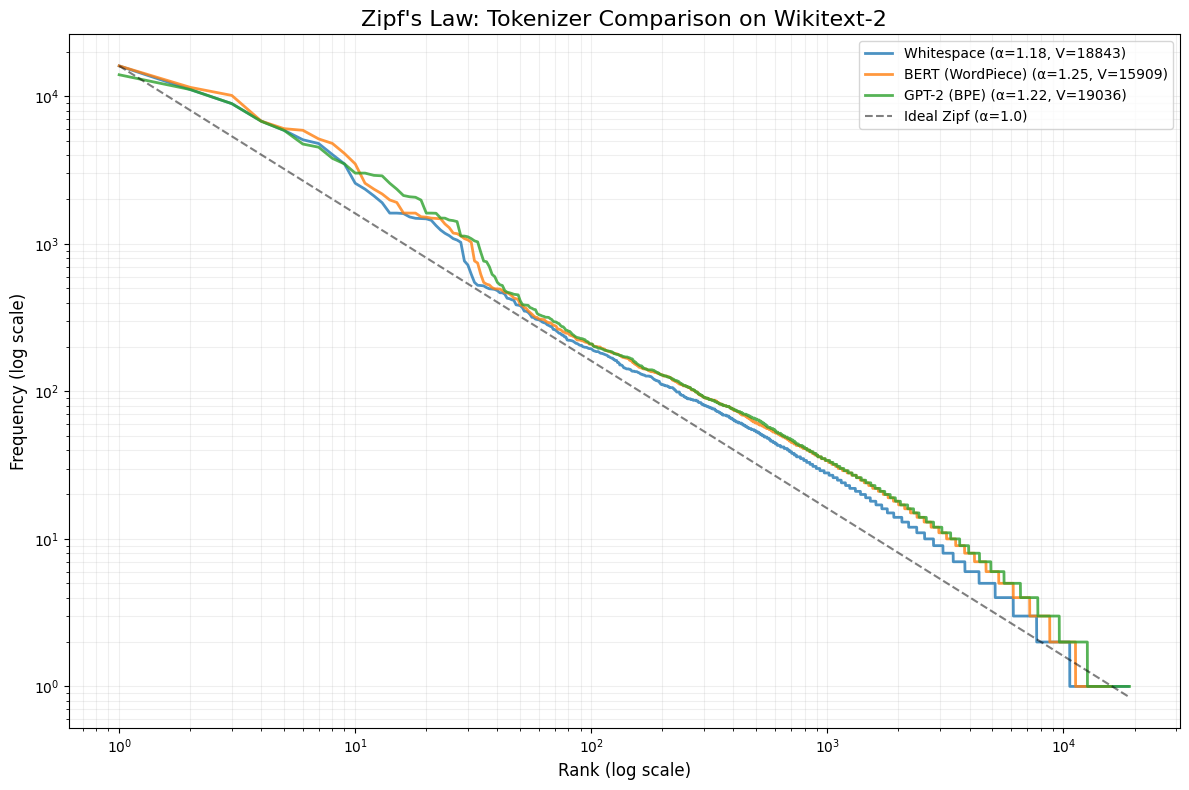

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datasets import load_dataset
from transformers import AutoTokenizer
from scipy import stats
import sys

class ZipfLawAnalyzer:
    def __init__(self, dataset_name="wikitext", subset="wikitext-2-raw-v1", split="test"):
        print(f"--- Initializing Analyzer ---")
        try:
            print(f"Loading dataset: {dataset_name} ({subset})...")
            # We use the test split for speed (it's smaller than train)
            self.dataset = load_dataset(dataset_name, subset, split=split)
        except Exception as e:
            print(f"Error loading dataset. Ensure you have internet and 'datasets' installed.")
            print(f"Error details: {e}")
            sys.exit(1)

        self.tokenizers = {}
        self.counts = {}

    def add_tokenizer(self, name, tokenizer_func):
        """
        Register a tokenizer function.
        func signature: (text: str) -> List[str]
        """
        self.tokenizers[name] = tokenizer_func
        self.counts[name] = Counter()

    def process_corpus(self, limit=None):
        """
        Iterate through corpus and count tokens.
        """
        print(f"Processing corpus ({len(self.dataset)} items)...")
        for i, item in enumerate(self.dataset):
            if limit and i >= limit:
                break

            text = item['text']
            if not text.strip():
                continue

            for name, func in self.tokenizers.items():
                tokens = func(text)
                self.counts[name].update(tokens)
        print("Processing complete.")

    def get_zipf_stats(self, name):
        """
        Return ranks and frequencies for plotting.
        """
        # Sort by frequency (descending)
        frequencies = sorted(self.counts[name].values(), reverse=True)
        ranks = np.arange(1, len(frequencies) + 1)
        return ranks, frequencies

    def calculate_alpha(self, name):
        """
        Calculate the Zipf alpha parameter (slope of the log-log plot).
        """
        ranks, freqs = self.get_zipf_stats(name)

        if len(ranks) < 2:
            return 0.0

        # Fit linear regression on log-log data
        log_ranks = np.log10(ranks)
        log_freqs = np.log10(freqs)

        slope, intercept, r_value, p_value, std_err = stats.linregress(log_ranks, log_freqs)
        return -slope  # Alpha is the negative slope

    def plot_results(self):
        plt.figure(figsize=(12, 8))

        # Plot each tokenizer
        for name in self.tokenizers:
            ranks, freqs = self.get_zipf_stats(name)

            if not len(ranks):
                print(f"Warning: No tokens found for {name}")
                continue

            alpha = self.calculate_alpha(name)
            vocab_size = len(ranks)

            # Log-Log Plot
            plt.loglog(ranks, freqs, label=f'{name} (α={alpha:.2f}, V={vocab_size})', linewidth=2, alpha=0.8)

        # Add ideal Zipf line for comparison (slope = -1)
        if self.tokenizers:
            # Anchor ideal line to the most frequent token of the first registered tokenizer
            first_name = list(self.tokenizers.keys())[0]
            r, f = self.get_zipf_stats(first_name)
            if len(f) > 0:
                # Formula: freq = C / rank
                ideal_zipf = [f[0] / rank for rank in r]
                plt.loglog(r, ideal_zipf, 'k--', label='Ideal Zipf (α=1.0)', alpha=0.5)

        plt.title("Zipf's Law: Tokenizer Comparison on Wikitext-2", fontsize=16)
        plt.xlabel("Rank (log scale)", fontsize=12)
        plt.ylabel("Frequency (log scale)", fontsize=12)
        plt.legend()
        plt.grid(True, which="both", ls="-", alpha=0.2)
        plt.tight_layout()
        plt.show()

# --- EXECUTION ---

if __name__ == "__main__":
    # 1. Initialize Analyzer
    analyzer = ZipfLawAnalyzer()

    # 2. Define Tokenizers

    # A. Whitespace (Baseline) - Rough approximation of "Words"
    def simple_tokenize(text):
        return text.lower().split()

    # B. BERT (WordPiece) - Subword tokenizer
    # Note: Requires 'pip install transformers'
    print("Loading BERT tokenizer...")
    try:
        bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
        def bert_tokenize(text):
            return bert_tokenizer.tokenize(text)
    except Exception as e:
        print(f"Could not load BERT tokenizer: {e}")
        bert_tokenize = None

    # C. GPT-2 (BPE) - Byte-Pair Encoding
    print("Loading GPT-2 tokenizer...")
    try:
        gpt2_tokenizer = AutoTokenizer.from_pretrained("gpt2")
        def gpt2_tokenize(text):
            return gpt2_tokenizer.tokenize(text)
    except Exception as e:
        print(f"Could not load GPT-2 tokenizer: {e}")
        gpt2_tokenize = None

    # 3. Register Tokenizers
    analyzer.add_tokenizer("Whitespace", simple_tokenize)

    if bert_tokenize:
        analyzer.add_tokenizer("BERT (WordPiece)", bert_tokenize)

    if gpt2_tokenize:
        analyzer.add_tokenizer("GPT-2 (BPE)", gpt2_tokenize)

    # 4. Run Analysis
    # processing the full test set (~4000 lines) takes a few seconds
    analyzer.process_corpus(limit=None)

    # 5. Visualize
    print("Generating plot...")
    analyzer.plot_results()

## Analysis Questions

### 1. Slope Interpretation
Look at the \(\alpha\) values shown in the legend. Zipf's Law suggests an ideal value of \(\alpha \approx 1\).

- Which tokenizer comes closest to this theoretical value?
- Why might the other tokenizers deviate from the ideal Zipfian distribution?

Consider how tokenization granularity and normalization affect frequency distributions.

---

### 2. The Tail
Observe the right side of the graph (low frequency, high rank).

- Do subword tokenizers (**BERT / GPT-2**) exhibit a *shorter tail* compared to the **Whitespace** tokenizer?
- Why does splitting rare words into subwords lead to this behavior?

Relate your explanation to how rare or unseen words are decomposed into more frequent units.

---

### 3. Vocabulary Size
Examine the maximum rank (the x-axis value where each curve ends).

- How does the maximum rank differ between the **Whitespace** tokenizer and **BERT**?
- How does this observation relate to the **Vocabulary Size vs. OOV (Out-Of-Vocabulary)** trade-off discussed in Section 1.3?

Explain how tokenizer design impacts vocabulary coverage and generalization.